# IDS Assignment Part 1 - <font color="red"><h7>Deadline: 18/12/2022 23:59</h7></font>
This is the first part of the assignments in IDS 2022/2023. 
Please use this Jupyter notebook to work on the questions posed in the assignment. When you are done, upload the notebook in Moodle at the designated activity. This is the _only_ file that is required. A separate report is _not_ needed and will not be considered for grading. 

Give your commented Python code and answers in the corresponding provided cells. Make sure to answer all questions in a clear and explicit manner and discuss your outputs. _Please do not change the general structure of this notebook_. You can, however, add additional markdown or code cells if necessary. <b>Please DO NOT CLEAR THE OUTPUT of the notebook you are submitting! </b>

<font color="red"> *Please make sure to include the names and matriculation numbers of all group members in the slot provided below.* </font> If a name or a student id is missing, the student will not receive any points.

Hint 1: While working on the assignment, you will get a better understanding of the dataset. Feel free to generate additional results and visualizations to support your answers. For example, this might be useful regarding data modification, data simplification, or output interpretation. <font color="red">Ensure that all your claims are supported.</font>

Hint 2: <font color="red">Plan your time wisely. </font> A few parts of this assignment may take some time to run. It might be necessary to consider time management when you plan your group work. Also, do not attempt to upload your assignment at the last minute before the deadline. This often does not work, and you will miss the deadline. Late submissions will not be considered.

Hint 3: RWTHmoodle allows multiple submissions, with every new submission overwriting the previous one. <b>Partial submissions are therefore possible and encouraged. </b> This might be helpful in case of technical issues with RWTHMoodle, which may occur close to the deadline.

<font color="red"><b>Student Names and IDs:
    
    1. Rishabh Bhatia 439082
    
    2. Erfan Moeini 441639
    
    3. Bipul Mani Pokhrei 437740

For those using Jupyter Notebook in your local environments, please install the following library in your environment:
```pip install umap-learn==0.5.3```

In [3]:
!pip install umap-learn==0.5.3

In [91]:
#your imports (only use libraries provided in the environment)
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from p_decision_tree.DecisionTree import DecisionTree
from sklearn.metrics import mean_squared_error, mean_absolute_error, silhouette_score
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR, LinearSVR
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
import umap.umap_ as umap
import re
import math

# Pricing your AirBnB

You finally made it! Working as a data scientist at an established process mining company in New York, you earned so much money that you can buy a flat for yourself. You decide to buy a 2-room apartment in Manhattan. Congratulations!

Currently, you are still living in your rental apartment and are tied to a long-running rental contract. You can only use the apartment in 5 years from now. Therefore, you want to use the apartment as an AirBnB in the meantime, generating some consistent income. 


You have no clue how you should price your AirBnB per night (you are living in New York, so you never needed to book an AirBnB). You decide to leverage your unique skill set and perform a data-driven, informed decision. You collect all the data you can get your hands on by traversing all New York apartments. The retrieved data set **AirBnB_original.csv** is your starting point for investigation.

## Question 1: Exploring the Data Set

As with every data set, you first want to know what you are dealing with. You perform some exploratory data analysis and clean the data along the way.

Show a few data points contained in the data set. Include all attributes.

In [6]:
# Your answer goes here
airbnb_df = pd.read_csv('./AirBnB_original.csv')

# Show the first 10 elements in the dataset
airbnb_df.head(10)

id      host id neighborhood group        neighborhood       lat  \
0  1001254  80014485718           Brooklyn          Kensington  40.64749   
1  1002102  52335172823          Manhattan             Midtown  40.75362   
2  1002403  78829239556          Manhattan              Harlem  40.80902   
3  1002755  85098326012           Brooklyn        Clinton Hill  40.68514   
4  1003689  92037596077          Manhattan         East Harlem  40.79851   
5  1004650  61300605564           Brooklyn  Bedford-Stuyvesant  40.68688   
6  1005202  90821839709           Brooklyn  Bedford-Stuyvesant  40.68688   
7  1005754  79384379533          Manhattan      Hell's Kitchen  40.76489   
8  1006859   1280143094          Manhattan           Chinatown  40.71344   
9  1007411  18824631834          Manhattan     Upper West Side  40.80316   

       long        country country code  instant bookable cancellation policy  \
0 -73.97237  United States           US                 0              strict   
1 -73.98377  United States           US                 0            moderate   
2 -73.94190  United States           US                 0            flexible   
3 -73.95976  United States           US                 0            moderate   
4 -73.94399  United States           US                 0            moderate   
5 -73.95596  United States           US                 0            moderate   
6 -73.95596  United States           US                 0            moderate   
7 -73.98493  United States           US                 0              strict   
8 -73.99037  United States           US                 0            flexible   
9 -73.96545  United States           US                 0            flexible   

         room type  construction year  price  service fee  minimum nights  \
0     Private room             2020.0    966        193.0             7.0   
1  Entire home/apt             2007.0    142         28.0             7.0   
2     Private room             2005.0    620        124.0             3.0   
3  Entire home/apt             2005.0    368         74.0             7.0   
4  Entire home/apt             2009.0    204         41.0             7.0   
5     Private room             2015.0     71         14.0             7.0   
6     Private room             2009.0   1060        212.0             7.0   
7     Private room             2005.0   1018        204.0             2.0   
8  Entire home/apt             2004.0    319         64.0             1.0   
9  Entire home/apt             2008.0    606        121.0             5.0   

   number of reviews  review rate number  calculated host listings count  \
0                9.0                 4.0                             6.0   
1               45.0                 4.0                             2.0   
2                0.0                 5.0                             1.0   
3              270.0                 4.0                             1.0   
4                9.0                 3.0                             1.0   
5               49.0                 5.0                             1.0   
6               49.0                 5.0                             1.0   
7              430.0                 3.0                             1.0   
8              160.0                 3.0                             4.0   
9               53.0                 4.0                             1.0   

   number rooms  
0             1  
1             2  
2             1  
3             2  
4             1  
5             1  
6             1  
7             1  
8             1  
9             2

### Basic Cleaning

First, you have to remove NaN entries across the data set such that we only keep rows without any NaN value. How many rows did you remove?

In [7]:
# Your answer goes here
cleaned_df = airbnb_df.dropna(axis=0)
# Get the number of rows in the original dataset
original_size = airbnb_df.shape[0]
# Get the number of rows after cleaning the dataset
cleaned_size = cleaned_df.shape[0]
# Get the number of rows removed after cleaning the dataset
removed_nan_count = original_size - cleaned_size
print(f"Number of rows with NaN values removed: {removed_nan_count}")

Number of rows with NaN values removed: 1477


Since duplicated entries are misleading, we want to remove duplicate flats (identified by their id), such that we only keep them once and create a new dataset. How many duplicates are removed?

In [8]:
# Your answer goes here
dup_removed_df = cleaned_df.drop_duplicates(subset=['id'])
dup_removed_count = cleaned_size - dup_removed_df.shape[0]
print(f"Number of duplicates removed: {dup_removed_count}")

Number of duplicates removed: 389


From now on, you work with the dataset **AirBnB_cleaned.csv**.

To get a feeling for nightly prices in New York, you take a look at the price attribute. Calculate the average price, the first and third quantiles, and the standard deviation.

In [9]:
# Your answer goes here

# Read the cleand dataset
airbnb_cleaned_df = pd.read_csv("./AirBnB_cleaned.csv")

criteria = {'mean': 'Mean', '25%': 'First Quantile', '75%': 'Third Quantile', 'std': 'Standard Deviation'}
# Get all the required criteria by using the describe function
info = airbnb_cleaned_df['price'].describe()
# Print out the criteria specified in the subtask
for criterion in criteria:
    print(f"{criteria[criterion]}: {info[criterion]}")

# """Alternative Approach"""
# price_df = airbnb_cleaned_df['price']
# price_avg = price_df.mean()
# price_std = price_df.std()
# first_quantile = price_df.quantile(0.25)
# third_quantile = price_df.quantile(0.75)
# print(f"Average Price: {price_avg}")
# print(f"Standard Deviation of Price: {price_std}")
# print(f"First Quantile: {first_quantile}")
# print(f"Third Quantile: {third_quantile}")

Mean: 625.4636797380085
First Quantile: 340.0
Third Quantile: 913.0
Standard Deviation: 331.23624102553555


You want to get a more visual picture of the price range. Use a histogram and boxplot to show the distribution of prices on the entire dataset.

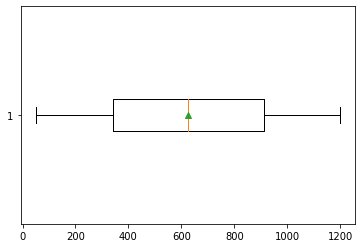

In [10]:
# Your answer goes here

# Draw the boxplot for the price
plt.boxplot(airbnb_cleaned_df['price'], sym='s', vert=False, showmeans=True);
# Note that the result indicates that there is no outlier in the price values

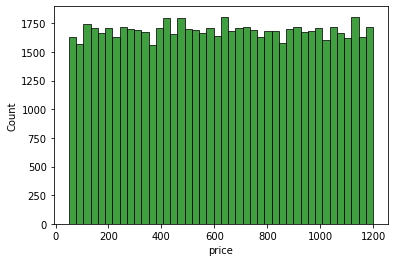

In [11]:
# Draw the histogram based on the price feature (Indicating the count)
sns.histplot(data=airbnb_cleaned_df, x="price", color='g');

### Exploring Price Relationships

To inform our pricing decision, we want to investigate some differentiating factors for pricing apartments.

Since you have an overview of the prices and their distribution, you want to investigate which features of your dataset you might use to make your pricing decision. To do so, discuss each feature of the dataset and already rule out features that will definitely not impact the pricing decision. Below you can find a brief description of each feature: 

- id: Unique identifier for an apartment
- host id: Identifier of the host offering a certain apartment
- neighborhood group: Name of a neighborhood group in which an apartment is located
- neighborhood: More fine-grained view on neighborhoods than neighborhood group
- lat: Latitude coordinate of an apartment
- long: Longitude coordinate of an apartment
- country: The country in which an apartment is located
- country code: Code of the country in which an apartment is located
- instant bookable: Boolean values if an apartment is instantly bookable
- cancellation policy: Policy for cancellation of booking
- room type: Type of apartment/room
- construction year: Year of construction of apartment
- price: Price for renting an apartment
- service fee: Fee of service
- minimum nights: Number of minimum nights to rent an apartment
- number of reviews: Number of reviews for an apartment
- review rate number:  Review rate for an apartment (1 to 5)
- calculated host listings count: Number of listings a host has
- number rooms: Number of rooms in an apartment

count        mean
neighborhood group                   
Bronx                2143  633.111526
Brooklyn            28008  627.011961
Manhattan           29996  622.910088
Queens               9902  627.530398
Staten Island         793  620.897856

Min: 620.8978562421186
Max: 633.1115258982735
Standard Deviation: 4.719428498093992


count        mean
neighborhood                      
Allerton            79  648.291139
Arden Heights        7  862.285714
Arrochar            46  638.173913
Arverne            198  652.833333
Astoria           1264  630.469937
...                ...         ...
Windsor Terrace    223  561.686099
Woodhaven          158  596.417722
Woodlawn            23  519.260870
Woodrow              2  551.500000
Woodside           419  644.742243

[222 rows x 2 columns]

Min: 107.66666666666667
Max: 1048.0
Standard Deviation: 95.81053460640369


count        mean
cancellation policy                   
flexible             23626  627.179209
moderate             23659  625.283740
strict               23557  623.923844

Min: 623.923844292567
Max: 627.1792093456362
Standard Deviation: 1.6350087775026636


count        mean
room type                         
Entire home/apt  38415  626.746453
Hotel room          83  673.530120
Private room     30899  624.123952
Shared room       1445  617.248443

Min: 617.2484429065744
Max: 673.5301204819277
Standard Deviation: 25.72558803181964


count        mean
construction year                   
2003                3632  620.278910
2004                3438  629.814136
2005                3585  619.081172
2006                3540  635.333333
2007                3462  628.347487
2008                3603  637.354427
2009                3601  622.021661
2010                3594  622.420423
2011                3522  624.198751
2012                3460  620.310405
2013                3447  619.979983
2014                3641  635.503158
2015                3597  617.074229
2016                3500  625.256571
2017                3506  626.913577
2018                3477  625.307737
2019                3566  605.799495
2020                3647  629.523170
2021                3503  627.401656
2022                3521  637.348481

Min: 605.7994952327538
Max: 637.3544268665001
Standard Deviation: 7.727273696780821


count        mean
minimum nights                   
1               17868  624.786546
2               16463  628.477313
3               10914  626.470680
4                4395  616.865984
5                3901  622.737247
6                 978  596.741309
7               16323  627.179563

Min: 596.741308793456
Max: 628.477312761951
Standard Deviation: 11.142680699058582


count        mean
review rate number                   
1                    6022  631.457323
2                   16127  629.972779
3                   16158  624.995544
4                   16204  624.005616
5                   16331  620.710673

Min: 620.7106729532791
Max: 631.4573231484557
Standard Deviation: 4.42346083419204


count        mean
number rooms                   
1             50055  574.102707
2             12660  642.377330
3              5176  878.221600
4              2951  980.757370

Min: 574.1027070222755
Max: 980.7573703829211
Standard Deviation: 192.17069140584988


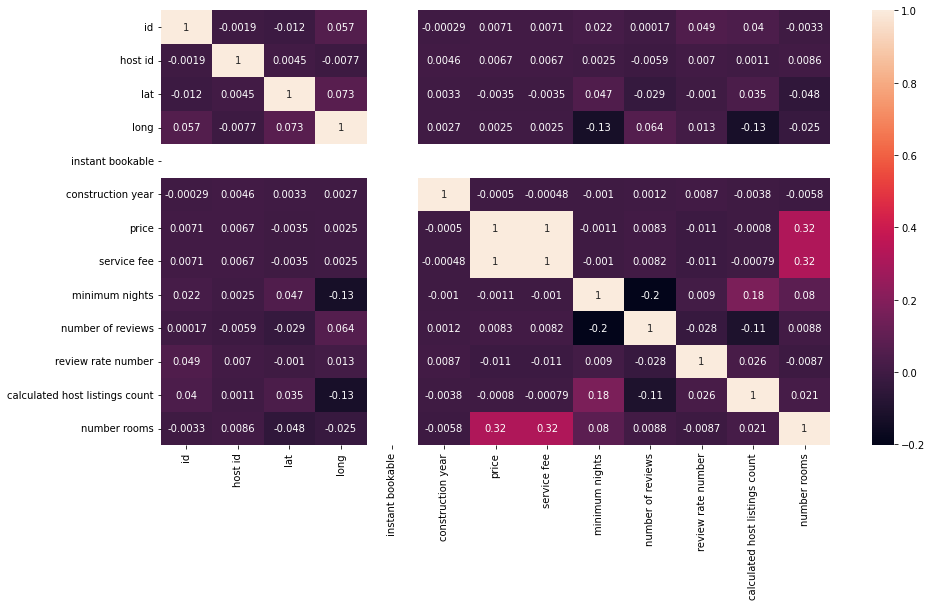

In [12]:
# Your answer goes here

# Overall analysis of the correlation between numerical features and price
plt.figure(figsize=(15,8))
sns.heatmap(airbnb_cleaned_df.corr(numeric_only=True), annot=True);

# Investigate the effect of categorical features or features with limited range on price values
features = ['neighborhood group', 'neighborhood', 'cancellation policy', 'room type', 'construction year', 'minimum nights', 'review rate number', 'number rooms']

# Calculate aggregated info for price based on different features in the list above
for feature in features:
    aggregated_data = airbnb_cleaned_df.groupby(feature)['price'].agg(['count', 'mean'])
    display(aggregated_data)
    print(f"Min: {aggregated_data['mean'].min()}")
    print(f"Max: {aggregated_data['mean'].max()}")
    print(f"Standard Deviation: {aggregated_data['mean'].std()}")


In [13]:
# Display the unique values for the features 'instant bookable', 'country', 'country code'. All these features have only one unique value
print(f"Unique Values for 'instant bookable': {airbnb_cleaned_df['instant bookable'].unique()[0]}")
print(f"Unique Values for 'country': {airbnb_cleaned_df['country'].unique()[0]}")
print(f"Unique Values for 'country code': {airbnb_cleaned_df['country code'].unique()[0]}")

Unique Values for 'instant bookable': 0
Unique Values for 'country': United States
Unique Values for 'country code': US


_Answer:_ 

### **Discussion on relevant and Irrelevant Features**
Because the descriptive features 'id' and 'host id' have unique values and are only used as an identifier, they do not provide us with any useful information. All the instances have the same country and country code, i.e. US, they will not have any effect on our estimation of the price value. The feature 'instant bookable' also has one unique value, which is zero; therefore, it won't play a role on price estimation. Based on the correlation heatmap that we drew, the number of rooms and the service fee seem to be positively correlated with the price value.

- **id**: Used only as an identifier and is unique for every instance. Therefore, it does not provide us with any insight for price estimation.

- **host id**: Used as an identifier fo rthe hosts offering the apartment. Therefore, it does not provide us with any useful insight for price estimation.

- **neighborhood group**: As the correlation heatmap suggests, there's not a strong correlation between the price value and neighborhood group. Besides, the aggregation applied considering neighborhood group and price values indicates that there's no significant variation between the mean of price values related to different neighborhood groups.

- **neighborhood**: This fine-grained representation of the neighborhood group has caused considerable variation in the mean values of prices related to different neighborhoods. The standard deviation of the mean value of prices grouped by neighborhoods is rather high, and this indicates that the neighborhood feature can affect the price to some extent

- **lat**: As the heatmap clearly indicates, there's no strong correlation between the latitude feature and the price.

- **long**: As the heatmap clearly indicates, there's no strong correlation between the longitude feature and the price.

- **country**: Since there's only one unique value for this feature, i.e. 'United States'., it does not have any impact and does not provide us with any insight for price estimation.

- **country code**: Since there's only one unique value for this feature, i.e. 'US'., it does not have any impact and does not provide us with any insight for price estimation.

- **instant bookable**: Since there's only one unique value for this feature, i.e. '0'., it does not have any impact and does not provide us with any insight for price estimation.

- **cancellation policy**: This feature does not cause great variation in the mean values of the prices. Therefore, its impact on price estimation is rather low. Besides, the correlation heatmap indicates that there's no strong relationship between the construction year and the price values.

- **room type**: This feature does not cause great variation in the mean values of the price. However, there's a small variation when the value of this feature is 'Hotel room' (The mean value of price shifts up a little for hotel rooms). Note that the standard deviation between the mean value of prices is also rather considerable. Therefore, we can conclude that this feature provides some insight for price estimation.

- **construction year**: This feature does not cause great variation in the mean values of the price, as the standard deviation between the mean value of prices when the instances are grouped by this feature is not significantly high.

- **service fee**: This feature has a strong positive correlation with the price values, as indicated by the correlation heatmap.

- **minimum nights**: This feature does not cause great variation in the mean values of the price, as the standard deviation between the mean value of prices when the instances are grouped by this feature is not significantly high. Note we can also conclude this from the joint distribution plot previously drawn.

- **number of reviews**: There's no strong positive correlation with the price values, as indicated by the correlation heatmap.

- **review rate number**: This feature does not cause great variation in the mean values of the price, as the standard deviation between the mean value of prices when the instances are grouped by this feature is not significantly high. This is also clearly suggested by the correlation heatmap drawn above.

- **calculated host listings count**: There's no strong positive correlation with the price values, as indicated by the correlation heatmap.

- **number rooms**: This feature positive correlation with the price values, as indicated by the correlation heatmap. Besides, the standard deviation between the mean value of prices is considerably high when the instances are grouped by this feature. Therefore, we can say that this feature provides us with insight for price estimation.

### Univariate Analysis

In the following, you want to analyze which features influence the price. You do this univariately, i.e., look at the relationship between one feature and the price individually. No matter which features you concluded to be useful in the last task, **you will consider the following seven features: service fee, minimum nights, neighborhood group, room type, cancellation policy, construction year, and the number of rooms.**

First, we look closely at the relationship between price and service fee. To do so, create a joint plot for these two attributes. What is your finding? Is this a helpful feature for our pricing decision?

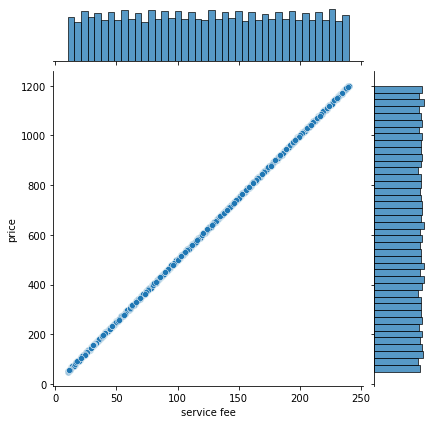

In [14]:
# Your answer goes here
sns.jointplot(data=airbnb_cleaned_df, x='service fee', y='price', kind='scatter');

_Answer:_

### **Service Fee and Price Correlation**

Yes, this seems to be a useful feature for pricing decision because there's a **positive correlation** between the **service fee** and the **price** based on the plot drawn above. As the service fee goes up, the price tends to increase.

Next, we are interested in the relationship between the number of minimum nights and the price. To analyze it, create a joint plot with a regression. Describe your observation.

minimum nights     price
minimum nights        1.000000 -0.001062
price                -0.001062  1.000000

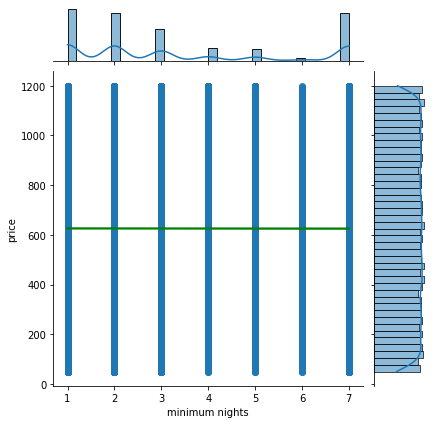

In [13]:
# Your answer goes here
# Get the correlation result to further interpret along with the jointplot
corr_result = airbnb_cleaned_df[['minimum nights', 'price']].corr()
display(corr_result)

# Draw the minimum nights jointplot with respect to price. Note that the regression line is drawn in green
sns.jointplot(data=airbnb_cleaned_df, x='minimum nights', y='price', kind='reg', joint_kws={'line_kws':{'color':'green'}});

_Answer:_

### **Minimum Nights and Price Correlation**

Based on the correlation calculated and the plot, we observe than there's **no strong correlation between** 'minimum nights' and 'price'. This is obvious from the plot and the correlation value of 0 which has been calculated between these two features. Note that a correlation of 0 indicates independence, correlation close to 1 indicates a positive relationship, and a correlation close to -1 indicates a negative relationship between two features. Additionally, we can conclude from the plot that there's a broad range of price values for each value of 'minimum nights'; therefore, the minimum nights can not provide useful insights for price estimation. We can also observe that the linear regression could not be fit to the data.

In [15]:
# Utility code for drawing grouped jointplots

class SeabornFig2Grid():

    def __init__(self, seaborngrid, fig,  subplot_spec):
        self.fig = fig
        self.sg = seaborngrid
        self.subplot = subplot_spec
        if isinstance(self.sg, sns.axisgrid.FacetGrid) or \
            isinstance(self.sg, sns.axisgrid.PairGrid):
            self._movegrid()
        elif isinstance(self.sg, sns.axisgrid.JointGrid):
            self._movejointgrid()
        self._finalize()

    def _movegrid(self):
        """ Move PairGrid or Facetgrid """
        self._resize()
        n = self.sg.axes.shape[0]
        m = self.sg.axes.shape[1]
        self.subgrid = gridspec.GridSpecFromSubplotSpec(n,m, subplot_spec=self.subplot)
        for i in range(n):
            for j in range(m):
                self._moveaxes(self.sg.axes[i,j], self.subgrid[i,j])

    def _movejointgrid(self):
        """ Move Jointgrid """
        h= self.sg.ax_joint.get_position().height
        h2= self.sg.ax_marg_x.get_position().height
        r = int(np.round(h/h2))
        self._resize()
        self.subgrid = gridspec.GridSpecFromSubplotSpec(r+1,r+1, subplot_spec=self.subplot)

        self._moveaxes(self.sg.ax_joint, self.subgrid[1:, :-1])
        self._moveaxes(self.sg.ax_marg_x, self.subgrid[0, :-1])
        self._moveaxes(self.sg.ax_marg_y, self.subgrid[1:, -1])

    def _moveaxes(self, ax, gs):
        #https://stackoverflow.com/a/46906599/4124317
        ax.remove()
        ax.figure=self.fig
        self.fig.axes.append(ax)
        self.fig.add_axes(ax)
        ax._subplotspec = gs
        ax.set_position(gs.get_position(self.fig))
        ax.set_subplotspec(gs)

    def _finalize(self):
        plt.close(self.sg.fig)
        self.fig.canvas.mpl_connect("resize_event", self._resize)
        self.fig.canvas.draw()

    def _resize(self, evt=None):
        self.sg.fig.set_size_inches(self.fig.get_size_inches())

To further investigate the pricing decision, you look at the remaining five features: neighborhood group, room type, cancellation policy, construction year, and the number of rooms.
To get an overview, you decide to create box plots (including the mean) for each of these features to visualize their influence on the price. Describe your findings. Which values of the features influence the price?

count        mean
neighborhood group                   
Bronx                2143  633.111526
Brooklyn            28008  627.011961
Manhattan           29996  622.910088
Queens               9902  627.530398
Staten Island         793  620.897856

Min: 620.8978562421186
Max: 633.1115258982735
Standard Deviation: 4.719428498093992


count        mean
room type                         
Entire home/apt  38415  626.746453
Hotel room          83  673.530120
Private room     30899  624.123952
Shared room       1445  617.248443

Min: 617.2484429065744
Max: 673.5301204819277
Standard Deviation: 25.72558803181964


count        mean
cancellation policy                   
flexible             23626  627.179209
moderate             23659  625.283740
strict               23557  623.923844

Min: 623.923844292567
Max: 627.1792093456362
Standard Deviation: 1.6350087775026636


count        mean
construction year                   
2003                3632  620.278910
2004                3438  629.814136
2005                3585  619.081172
2006                3540  635.333333
2007                3462  628.347487
2008                3603  637.354427
2009                3601  622.021661
2010                3594  622.420423
2011                3522  624.198751
2012                3460  620.310405
2013                3447  619.979983
2014                3641  635.503158
2015                3597  617.074229
2016                3500  625.256571
2017                3506  626.913577
2018                3477  625.307737
2019                3566  605.799495
2020                3647  629.523170
2021                3503  627.401656
2022                3521  637.348481

Min: 605.7994952327538
Max: 637.3544268665001
Standard Deviation: 7.727273696780821


count        mean
number rooms                   
1             50055  574.102707
2             12660  642.377330
3              5176  878.221600
4              2951  980.757370

Min: 574.1027070222755
Max: 980.7573703829211
Standard Deviation: 192.17069140584988


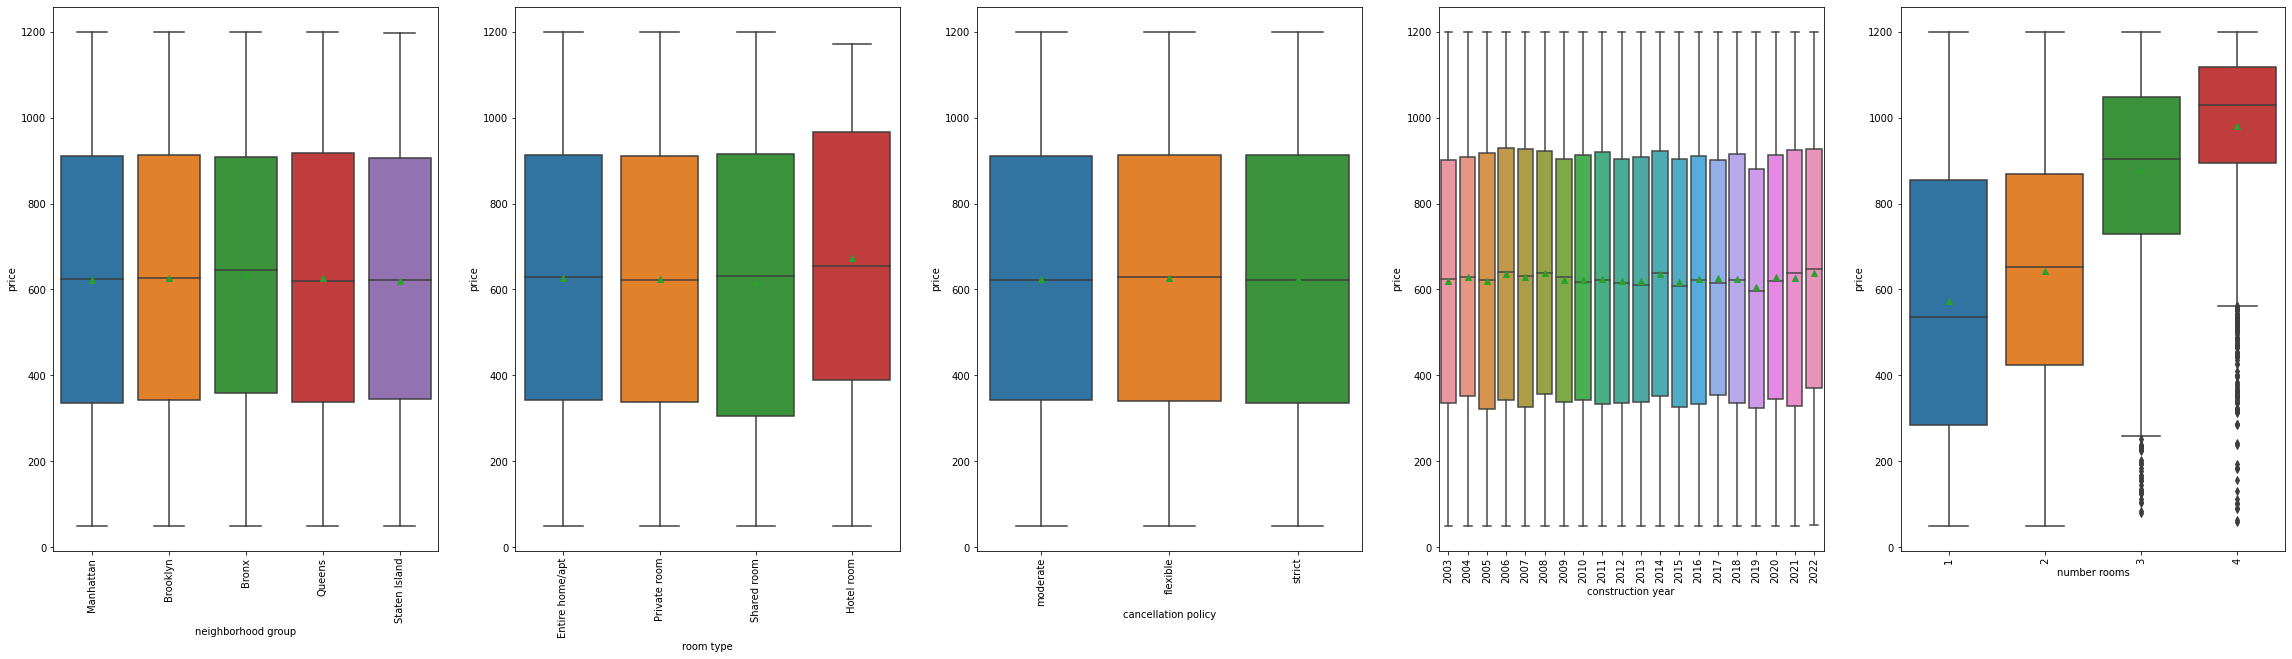

In [16]:
# Your answer goes here

# Calculate aggregated info for the price based on different features
features = ['neighborhood group', 'room type', 'cancellation policy', 'construction year', 'number rooms']
fig, axs = plt.subplots(1, len(features), figsize=(40, 10))
for index, feature in enumerate(features):
    aggregated_data = airbnb_cleaned_df[[feature, 'price']].groupby(by=feature)['price'].agg(['count', 'mean'])
    display(aggregated_data)
    print(f"Min: {aggregated_data['mean'].min()}")
    print(f"Max: {aggregated_data['mean'].max()}")
    print(f"Standard Deviation: {aggregated_data['mean'].std()}")
    # Draw the boxplot based on different features with respect to the price values
    ax = sns.boxplot(data=airbnb_cleaned_df, x=feature, y='price', ax=axs[index], showmeans=True)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

_Answer:_

1. The feature **neighborhood group** does not have much influence on the price because there's not much variation in the price based on different values of this feature. This can also be observed from the standard deviation computed between the mean price values of different neighborhood groups, which is not significant. However, there's a small variation in the price for **Bronx** neighborhood group (The mean value of price for **Bronx** is higher) and **Manhattan** and **Staten Island** (They have lower means for the price value).

2. The feature **room type** does not have much influence on the price because there's not much variation in the price based on different values of this feature. We can also conclude this from the standard deviation calculated for the mean price values of different room types, which is not considerable. However, there's a small variation in the price for **Shared room** (results in lower prices based on the mean value) and **Hotel room** (results in higher prices based on the mean value).

3. The feature **cancellation policy** does not have much influence on the price because there's not much variation in the price based on different values of this feature. This can also be observed from the standard deviation computed between the mean price values of different cancellation policies. However, based on the mean aggregation, the more flexible the cancellation policy is, the higher the average price will be.

4. Based on the **construction year**, price values vary slightly for different years. However, the variation is small. For the years **2008**, **2014** and **2022**, we seem to have the highest prices, and for the year **2019**, we have the lowest mean price value. Note that the standrd deviation between the mean price values based on different construction years does not display a considerable difference.

5. The feature **number rooms** seems to have a considerable effect on price based on the boxplot and the correlation heatmap that we had already plotted. As it's clearly obvious from the boxplot, the prices (the mean value of the prices) tend to increase as the number of rooms increase. This is also obvious from the significant standard deviation calculated for the mean price values based on different number of rooms. Note that there are a number of outliers in the boxplot related to this feature. By the observation made below, we can see that these outliers are related to the fact that the price values could differ based on the other features with respect to which we are performing our analysis ().

In [17]:
# Utility function for performing quantile aggregation on price based on different features
def quantile(n):
    def quantile_(x):
        return np.quantile(x, n)
    quantile_.__name__ = 'quantile_%s' % n
    return quantile_

# Exploratory analysis of price variations and additional info based on different features
features = ['neighborhood group', 'room type', 'cancellation policy', 'construction year', 'number rooms', 'price']
aggregated_data = airbnb_cleaned_df[features].groupby(by=['number rooms', 'neighborhood group', 'room type'])['price'].agg(['count', 'mean', 'min', quantile(0.25), 'max', quantile(0.75)])
aggregated_data

count         mean  min  \
number rooms neighborhood group room type                                  
1            Bronx              Entire home/apt    279   403.835125   50   
                                Private room      1196   638.045151   50   
                                Shared room         85   591.458824   63   
             Brooklyn           Entire home/apt   6243   472.078808   50   
                                Hotel room           3   664.333333  246   
                                Private room     13004   623.171486   50   
                                Shared room        505   601.706931   51   
             Manhattan          Entire home/apt   9414   499.293818   50   
                                Hotel room          74   689.108108   50   
                                Private room     10626   620.622436   50   
                                Shared room        606   626.698020   50   
             Queens             Entire home/apt   1526   434.420708   50   
                                Hotel room           6   486.000000  242   
                                Private room      5694   631.698630   50   
                                Shared room        236   630.792373   50   
             Staten Island      Entire home/apt    166   487.602410   50   
                                Private room       379   597.245383   50   
                                Shared room         13   703.230769  182   
2            Bronx              Entire home/apt    261   571.639847   55   
             Brooklyn           Entire home/apt   4600   630.254783   50   
             Manhattan          Entire home/apt   6525   666.511877   51   
             Queens             Entire home/apt   1161   576.291128   53   
             Staten Island      Entire home/apt    113   584.628319   79   
3            Bronx              Entire home/apt    188   839.154255  198   
             Brooklyn           Entire home/apt   2311   868.649935  103   
             Manhattan          Entire home/apt   1813   905.519029  500   
             Queens             Entire home/apt    790   853.378481   80   
             Staten Island      Entire home/apt     74   872.824324  398   
4            Bronx              Entire home/apt    134   923.529851   60   
             Brooklyn           Entire home/apt   1342   967.186289   64   
             Manhattan          Entire home/apt    938  1032.255864  801   
             Queens             Entire home/apt    489   938.572597  130   
             Staten Island      Entire home/apt     48   943.333333   90   

                                                 quantile_0.25   max  \
number rooms neighborhood group room type                              
1            Bronx              Entire home/apt         193.00  1192   
                                Private room            368.00  1200   
                                Shared room             284.00  1171   
             Brooklyn           Entire home/apt         218.00  1200   
                                Hotel room              543.00   907   
                                Private room            342.00  1200   
                                Shared room             290.00  1191   
             Manhattan          Entire home/apt         235.00  1200   
                                Hotel room              442.75  1172   
                                Private room            329.00  1200   
                                Shared room             317.00  1199   
             Queens             Entire home/apt         211.00  1198   
                                Hotel room              364.75   912   
                                Private room            344.25  1200   
                                Shared room             335.00  1188   
             Staten Island      Entire home/apt         269.75  1180   
                                Private room            317.00  1189   
                    

### Multivariate Analysis

As the univariate analysis of price relationships provided only limited insights, you decide to visualize some multivariate investigations of the price. **No matter what you concluded in the last section, you will use the features construction year, number of rooms, cancellation policy, room type, and neighborhood group in the multivariate analysis.**
For each pair of features, create a grouped boxplot (using the hue argument) and investigate whether the two features together allow for an explanation of price differences. In the end, conclude which combination of features should be used to make your pricing decision.

In [18]:
# Define utility finctions for plotting charts for the next subtasks
features = ["neighborhood group", "construction year", "number rooms", "cancellation policy", "room type"]
features_count = len(features)
plot_rows = (features_count - 1) // 2
plot_cols = (features_count - 1) // 2

def display_multivariate_analysis(x):
    fig, axes = plt.subplots(plot_rows, plot_cols, figsize=(plot_cols * 20, plot_rows * 20))
    feats = [feature for feature in features if feature != x]
    for index, feature in enumerate(feats):
        aggregated_data = airbnb_cleaned_df[[x, feature, 'price']].groupby(by=[x, feature])['price'].agg(['count', 'mean'])    
        display(aggregated_data)
        sns.boxplot(ax=axes[index // plot_cols, index % plot_cols], data=airbnb_cleaned_df, x=x, y='price', hue=feature)
    fig.suptitle('Multivariate Analysis for {}'.format(x))

#### Multivariate Analysis for Neighborhood Group

count        mean
neighborhood group construction year                   
Bronx              2003                 130  603.769231
                   2004                 137  654.335766
                   2005                  83  632.180723
                   2006                 108  640.675926
                   2007                 101  663.613861
...                                     ...         ...
Staten Island      2018                  28  652.678571
                   2019                  32  661.031250
                   2020                  40  644.675000
                   2021                  36  604.972222
                   2022                  33  682.363636

[100 rows x 2 columns]

count         mean
neighborhood group number rooms                    
Bronx              1              1560   593.619231
                   2               261   571.639847
                   3               188   839.154255
                   4               134   923.529851
Brooklyn           1             19755   574.880537
                   2              4600   630.254783
                   3              2311   868.649935
                   4              1342   967.186289
Manhattan          1             20720   565.919836
                   2              6525   666.511877
                   3              1813   905.519029
                   4               938  1032.255864
Queens             1              7462   591.208925
                   2              1161   576.291128
                   3               790   853.378481
                   4               489   938.572597
Staten Island      1               558   567.096774
                   2               113   584.628319
                   3                74   872.824324
                   4                48   943.333333

count        mean
neighborhood group cancellation policy                   
Bronx              flexible               732  624.612022
                   moderate               727  647.390646
                   strict                 684  627.030702
Brooklyn           flexible              9292  630.548429
                   moderate              9277  624.594804
                   strict                9439  625.906240
Manhattan          flexible             10092  622.206698
                   moderate             10098  625.451178
                   strict                9806  621.017234
Queens             flexible              3252  632.982472
                   moderate              3282  623.131627
                   strict                3368  626.552553
Staten Island      flexible               258  634.476744
                   moderate               275  609.618182
                   strict                 260  619.353846

count        mean
neighborhood group room type                         
Bronx              Entire home/apt    862  630.373550
                   Private room      1196  638.045151
                   Shared room         85  591.458824
Brooklyn           Entire home/apt  14496  631.330988
                   Hotel room           3  664.333333
                   Private room     13004  623.171486
                   Shared room        505  601.706931
Manhattan          Entire home/apt  18690  623.825789
                   Hotel room          74  689.108108
                   Private room     10626  620.622436
                   Shared room        606  626.698020
Queens             Entire home/apt   3966  621.566062
                   Hotel room           6  486.000000
                   Private room      5694  631.698630
                   Shared room        236  630.792373
Staten Island      Entire home/apt    401  640.583541
                   Private room       379  597.245383
                   Shared room         13  703.230769

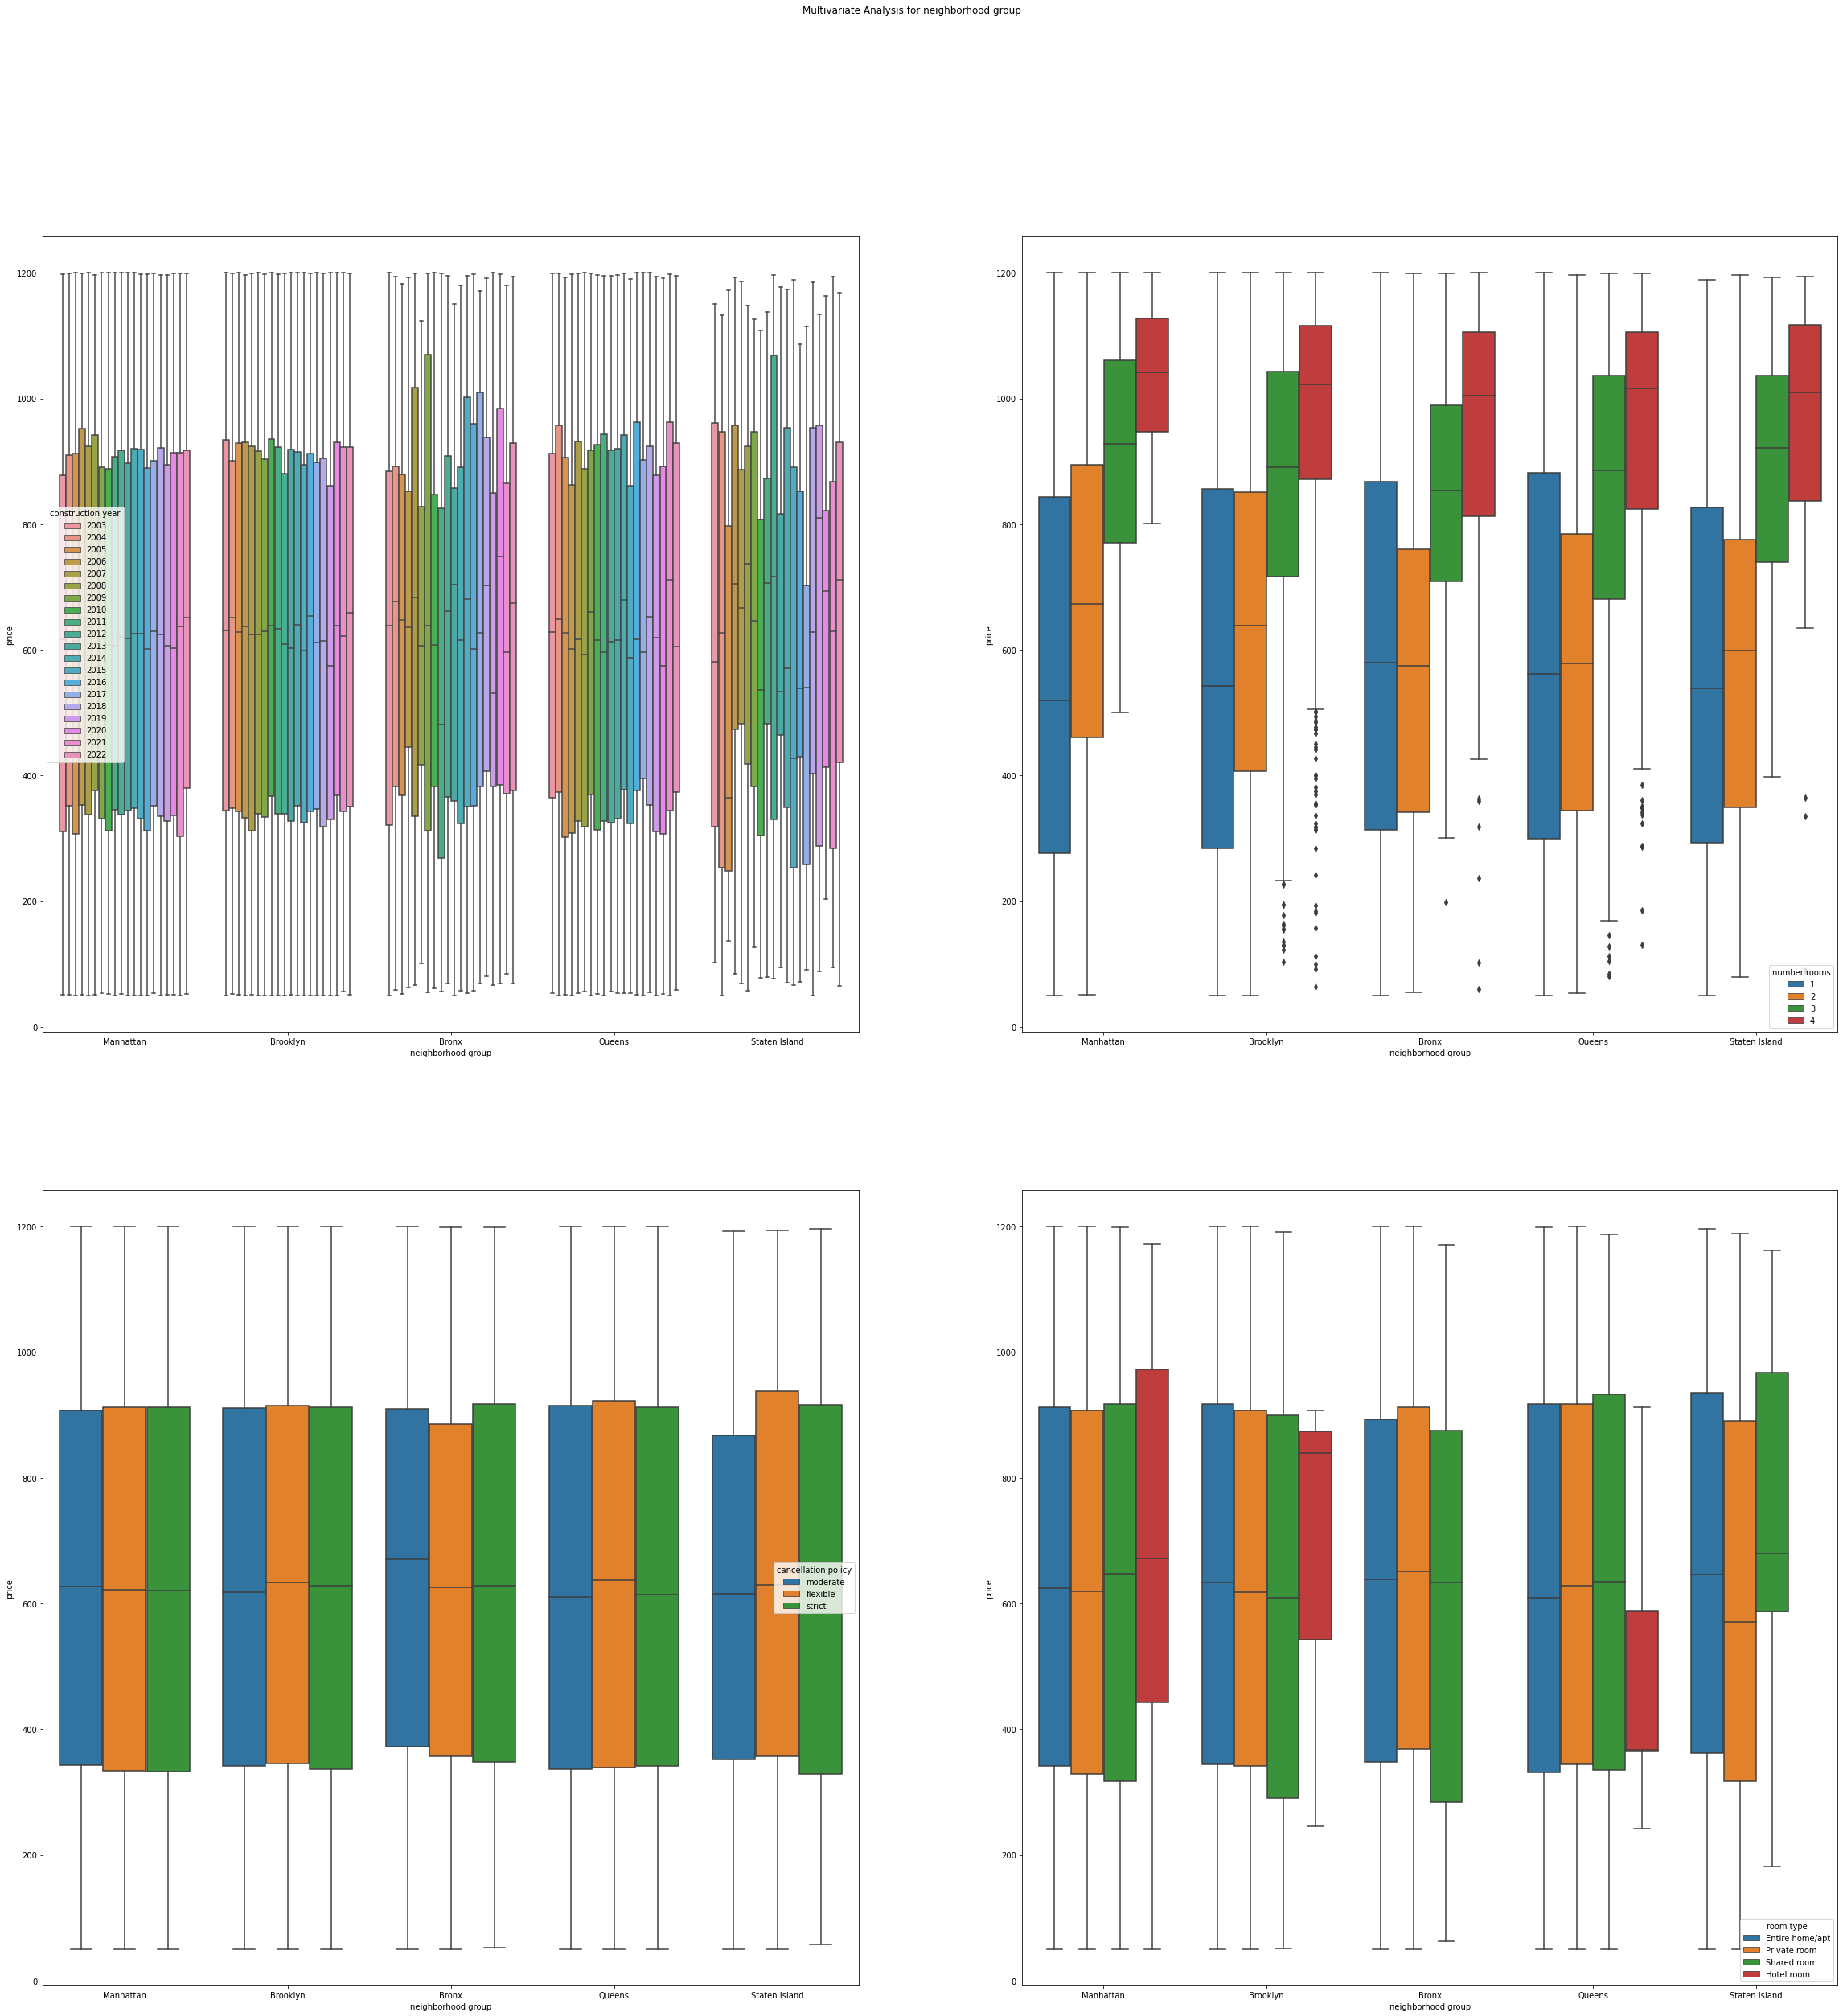

In [19]:
# Your answer goes here    
display_multivariate_analysis("neighborhood group")

_Answer:_ 

1. The combination of **number rooms** and **neighborhood group** has high variance. However, this change in price is mostly related to the increase in number of rooms since the plot for each of the different neighborhood groups follows the same pattern. Hence, this combination could be used.
2. For the combination of **room type** and **neighborhood group**, the value *hotel room* for **room type** with seems to vary for different neighborhood groups. Hence this combination could be used.
3. The combination of **cancellation policy** and **neighobrhood group** does not seem to yield much variance among the price values. Therefore, this combination is not quite insightful for price estimation.
4. The combination of **construction year** and **neighborhood group** could result to some insight for certain neighborhood groups and specific years. For instance, for *Bronx* and *Staten Island* neighborhood groups, price values vary to some extent for different construction years.

#### Multivariate Analysis for Room Type

count        mean
room type       neighborhood group                   
Entire home/apt Bronx                 862  630.373550
                Brooklyn            14496  631.330988
                Manhattan           18690  623.825789
                Queens               3966  621.566062
                Staten Island         401  640.583541
Hotel room      Brooklyn                3  664.333333
                Manhattan              74  689.108108
                Queens                  6  486.000000
Private room    Bronx                1196  638.045151
                Brooklyn            13004  623.171486
                Manhattan           10626  620.622436
                Queens               5694  631.698630
                Staten Island         379  597.245383
Shared room     Bronx                  85  591.458824
                Brooklyn              505  601.706931
                Manhattan             606  626.698020
                Queens                236  630.792373
                Staten Island          13  703.230769

count        mean
room type       construction year                   
Entire home/apt 2003                2024  613.932806
                2004                1914  633.367816
                2005                1996  615.975952
                2006                1917  641.970788
                2007                1870  636.982353
...                                  ...         ...
Shared room     2018                  81  637.641975
                2019                  63  602.603175
                2020                  83  581.686747
                2021                  79  585.202532
                2022                  65  562.569231

[80 rows x 2 columns]

count        mean
room type       number rooms                   
Entire home/apt 1             17628  482.418766
                2             12660  642.377330
                3              5176  878.221600
                4              2951  980.757370
Hotel room      1                83  673.530120
Private room    1             30899  624.123952
Shared room     1              1445  617.248443

count        mean
room type       cancellation policy                   
Entire home/apt flexible             12872  630.178372
                moderate             12780  628.560720
                strict               12763  621.468542
Hotel room      flexible                31  683.096774
                moderate                28  582.642857
                strict                  24  767.208333
Private room    flexible             10221  622.598082
                moderate             10378  622.097418
                strict               10300  627.680000
Shared room     flexible               502  640.097610
                moderate               473  609.177590
                strict                 470  600.965957

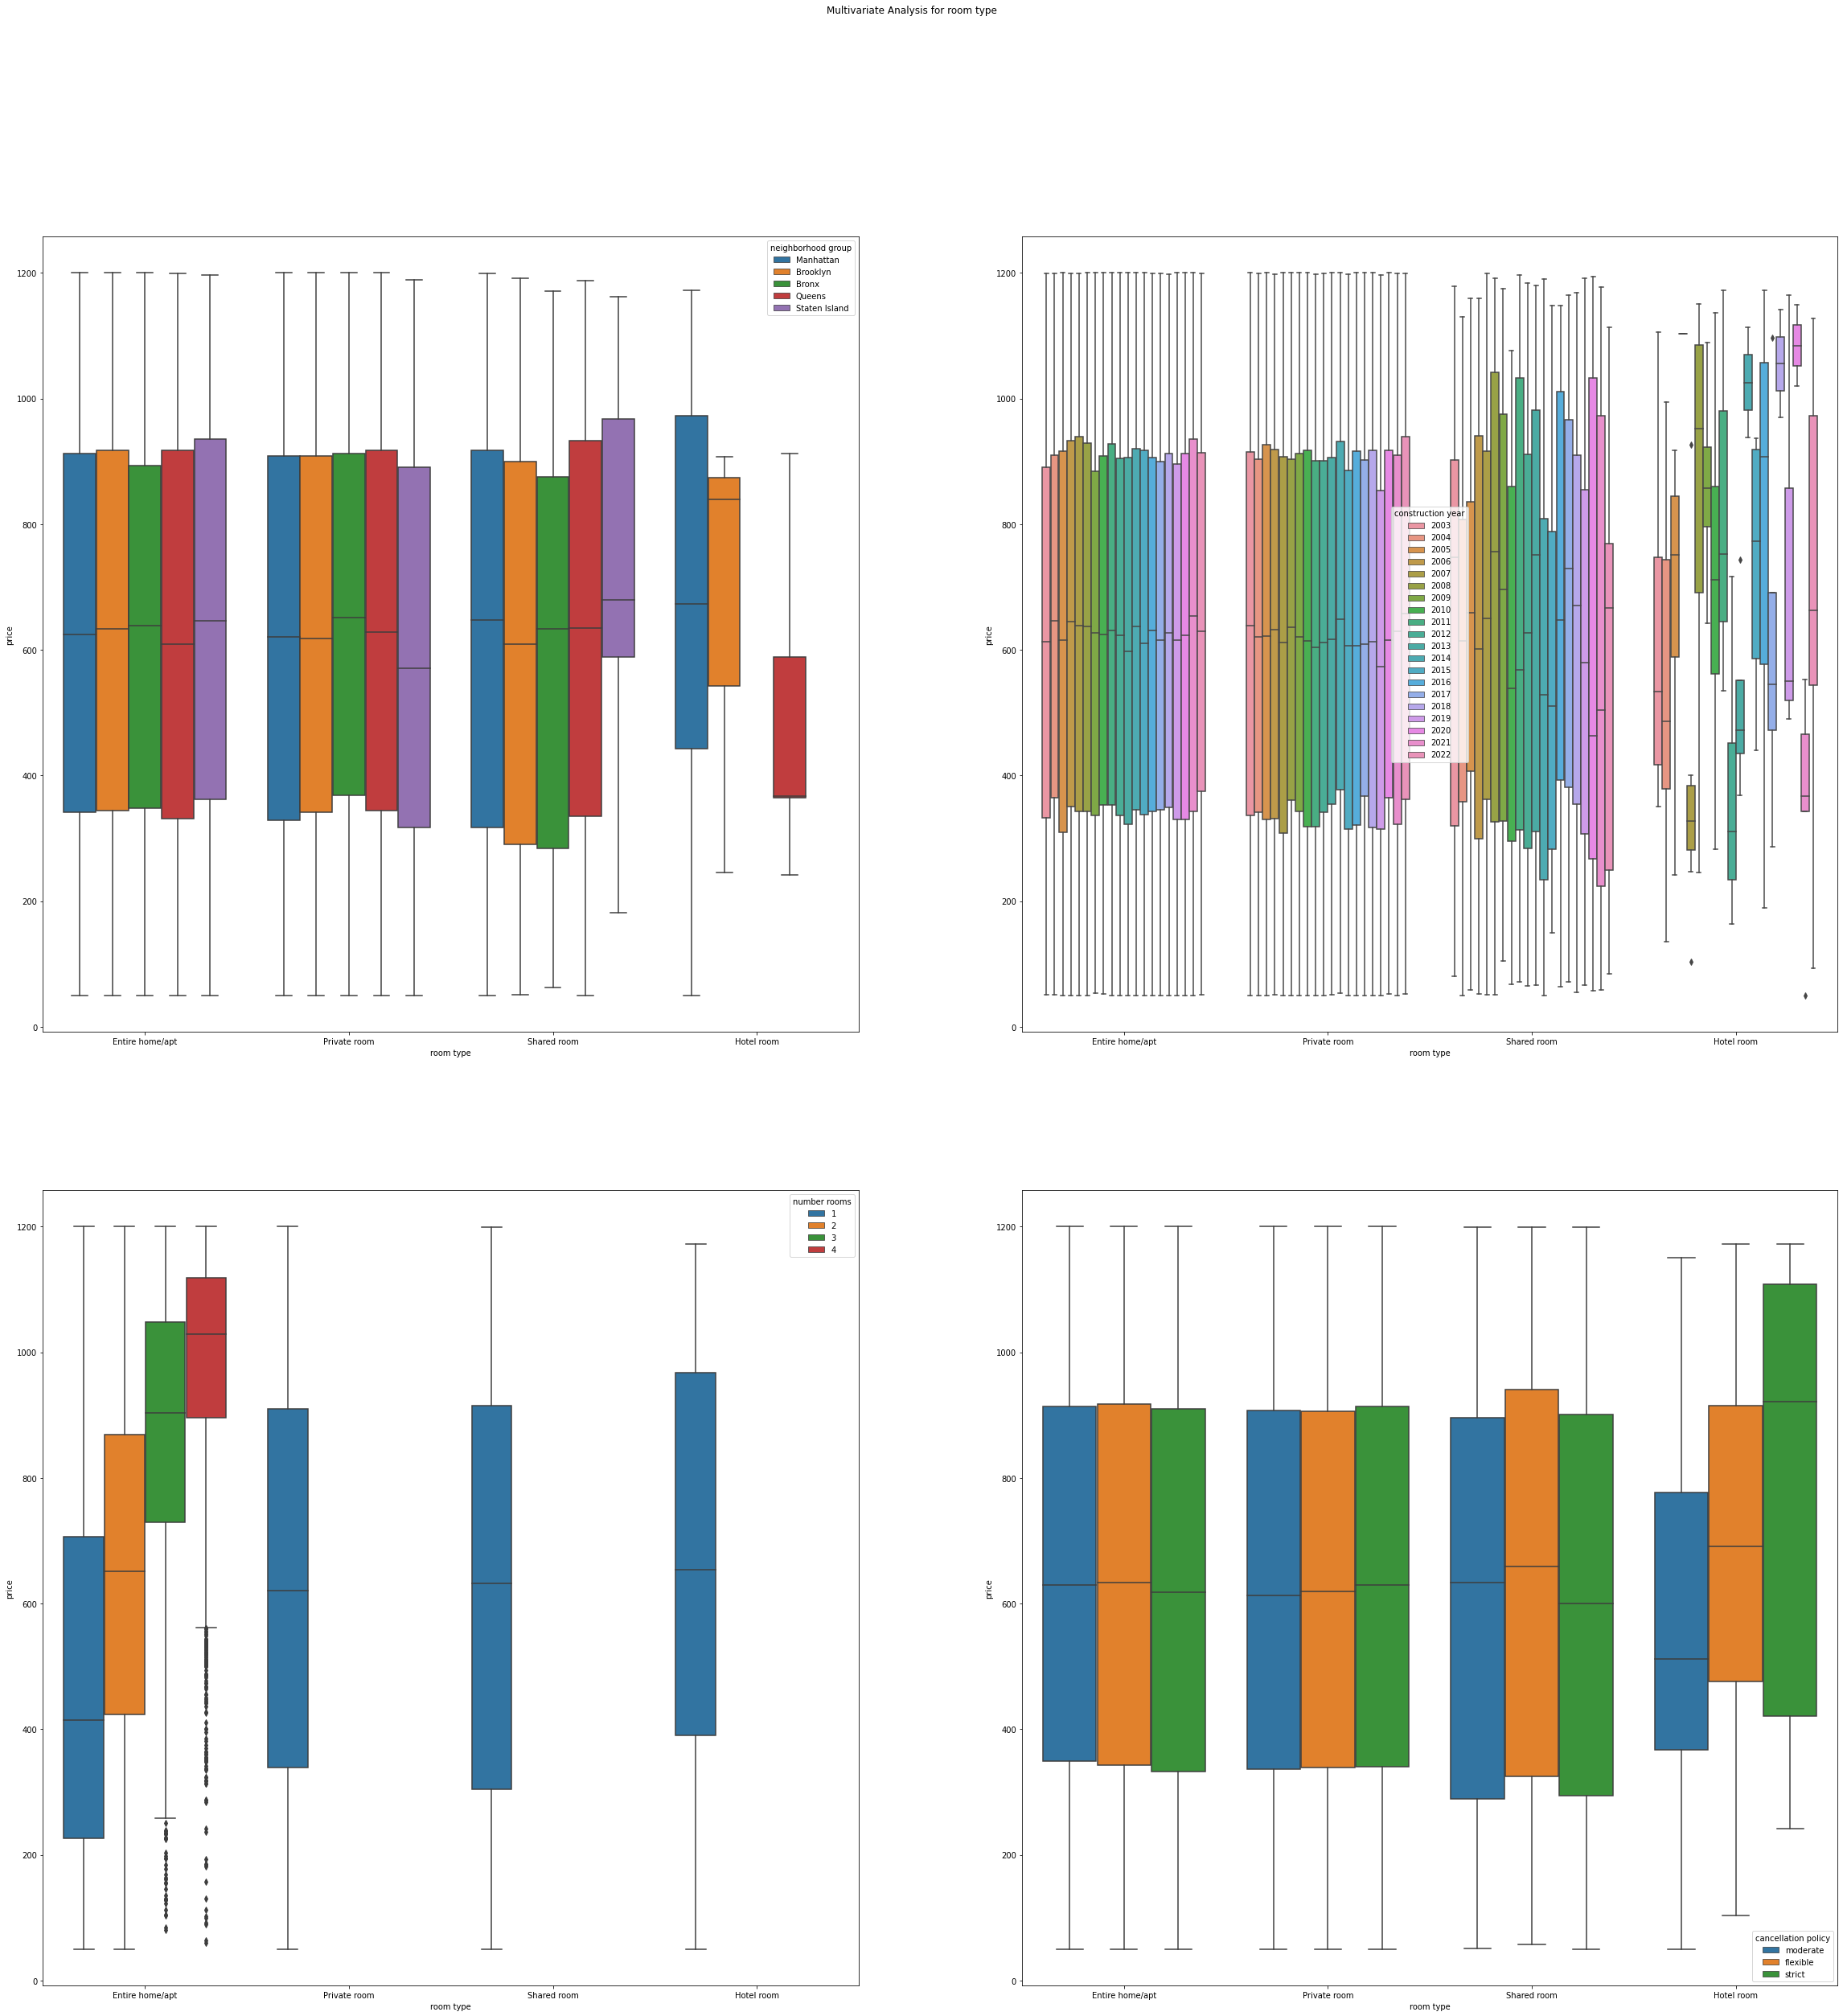

In [20]:
# Your answer goes here
display_multivariate_analysis("room type")

_Answer:_
1. The combination of **number rooms** and **room type** yields high variance. Note that as the room type changes, the number of rooms will be limited. For instance, there is only 1 room available for each of the room types other than *Entrie home/apt*. Hence, this combination could be used as both can cause variation in price values.

2. The combination of **room type** and **neighborhood group** seems to be insightful, especially when the **room type** is *hotel room*. There seems to be no hotel rooms for *Bronx* and *Staten Island* neighborhood groups. The price value of the hotel rooms is lower in *Queens* neighborhood group compared to other types of rooms, and the price value of hotel rooms in *Brooklyn* seems to be higher than other types of rooms in this neighborhood group.

3. The combination of **room type** and **construction year** yields considerable variance when the room type is either *Shared room* or *Hotel room* for different construction years. Hence, this combination could be useful.

4. The combination of **room type** and **cancellation policy** is insightful for the case of hotel rooms. In this case, The mean price value significantly increases for *strict* cancellation policy, and it decreases for *moderate* cancellation policy.

#### Multivariate Analysis for Number of Rooms

count         mean
number rooms neighborhood group                    
1            Bronx                1560   593.619231
             Brooklyn            19755   574.880537
             Manhattan           20720   565.919836
             Queens               7462   591.208925
             Staten Island         558   567.096774
2            Bronx                 261   571.639847
             Brooklyn             4600   630.254783
             Manhattan            6525   666.511877
             Queens               1161   576.291128
             Staten Island         113   584.628319
3            Bronx                 188   839.154255
             Brooklyn             2311   868.649935
             Manhattan            1813   905.519029
             Queens                790   853.378481
             Staten Island          74   872.824324
4            Bronx                 134   923.529851
             Brooklyn             1342   967.186289
             Manhattan             938  1032.255864
             Queens                489   938.572597
             Staten Island          48   943.333333

count         mean
number rooms construction year                    
1            2003                2559   568.994920
             2004                2364   570.895093
             2005                2519   563.281064
             2006                2484   581.610306
             2007                2442   574.372645
...                               ...          ...
4            2018                 117   951.564103
             2019                 135   986.925926
             2020                 161   967.366460
             2021                 163  1001.024540
             2022                 153   974.705882

[80 rows x 2 columns]

count        mean
number rooms cancellation policy                   
1            flexible             16669  573.969464
             moderate             16721  575.738772
             strict               16665  572.594419
2            flexible              4220  646.584597
             moderate              4247  638.060278
             strict                4193  642.515621
3            flexible              1714  880.564761
             moderate              1724  877.013921
             strict                1738  877.108746
4            flexible              1023  989.603128
             moderate               967  977.089969
             strict                 961  975.031217

count        mean
number rooms room type                         
1            Entire home/apt  17628  482.418766
             Hotel room          83  673.530120
             Private room     30899  624.123952
             Shared room       1445  617.248443
2            Entire home/apt  12660  642.377330
3            Entire home/apt   5176  878.221600
4            Entire home/apt   2951  980.757370

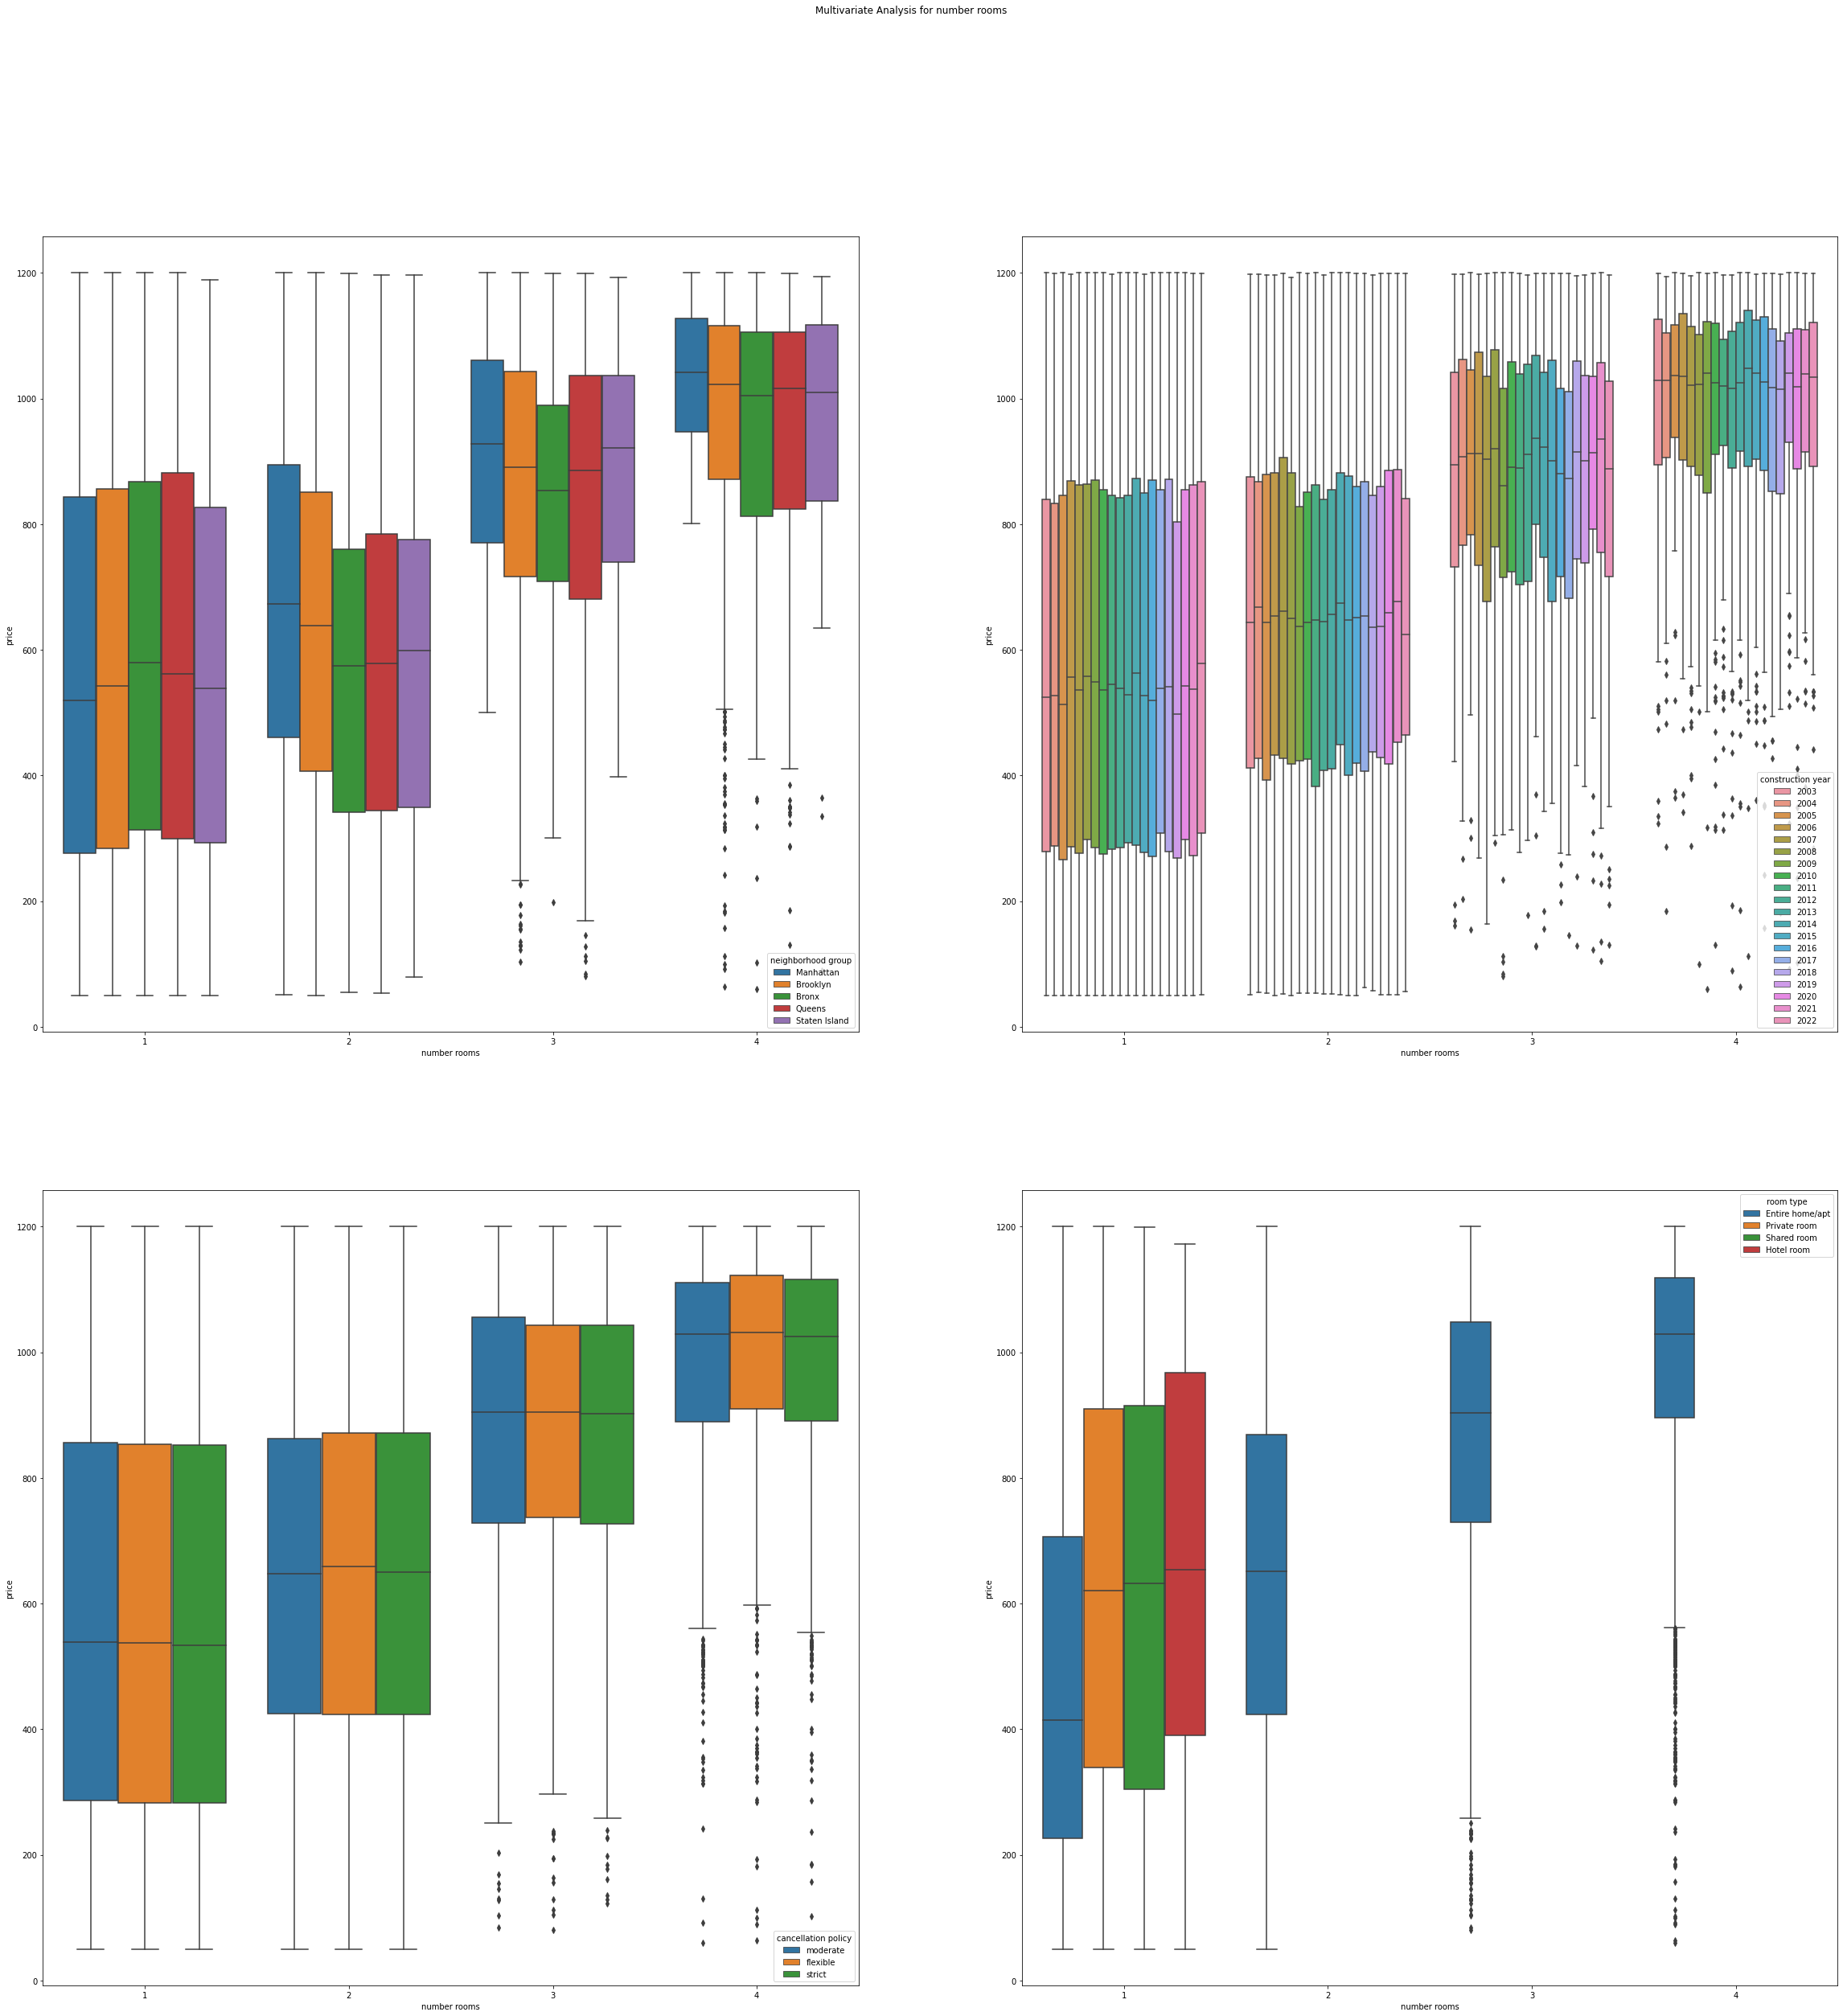

In [21]:
# Your answer goes here
display_multivariate_analysis("number rooms")

_Answer:_

Note that in general, as the number of rooms increases, the mean price value increases as well. This is clearly evident from the pattern that each of the boxplots drawn above follows.

1. The combination of **number rooms** with **neighborhood group** seems to be insightful, as the mean price value increases for all the neighborhood groups when the number of rooms increases. Note that there's a variation in price values among different neighborhood groups for each of the different number of rooms. Hence, this combination can be useful for price estimation.

2. The combination of **number rooms** and **construction year** seems to cause variation in mean price values; however, this change is mostly due to the change in the number of rooms.

3. The combination of **number rooms** and **cancellation policy** seems to cause variation in mean price values; however, this change is mostly due to the change in the number of rooms. Note that the plots follow the same pattern for different cancellation policies, and only change when the number of rooms changes.

4. The combination of **number rooms** and **room type** cause changes in mean price values. Note that there is only one type of room available when the number of rooms is more than 1, i.e. *Entire home/apt*.


#### Multivariate Analysis for Construction Year

count        mean
construction year neighborhood group                   
2003              Bronx                 130  603.769231
                  Brooklyn             1442  630.242025
                  Manhattan            1515  605.968977
                  Queens                496  640.092742
                  Staten Island          49  612.755102
...                                     ...         ...
2022              Bronx                 120  637.916667
                  Brooklyn             1456  636.328984
                  Manhattan            1415  639.604947
                  Queens                497  630.784708
                  Staten Island          33  682.363636

[100 rows x 2 columns]

count         mean
construction year number rooms                    
2003              1              2559   568.994920
                  2               658   635.363222
                  3               266   873.672932
                  4               149   982.073826
2004              1              2364   570.895093
...                               ...          ...
2021              4               163  1001.024540
2022              1              2441   590.089717
                  2               647   638.391036
                  3               280   862.592857
                  4               153   974.705882

[80 rows x 2 columns]

count        mean
construction year cancellation policy                   
2003              flexible              1221  611.857494
                  moderate              1211  618.252684
                  strict                1200  630.892500
2004              flexible              1160  632.266379
                  moderate              1133  622.941748
                  strict                1145  634.130131
2005              flexible              1157  629.742437
                  moderate              1252  621.013578
                  strict                1176  606.534864
2006              flexible              1165  620.116738
                  moderate              1177  637.124044
                  strict                1198  648.371452
2007              flexible              1230  623.937398
                  moderate              1156  620.243945
                  strict                1076  642.094796
2008              flexible              1177  651.046729
                  moderate              1225  632.579592
                  strict                1201  628.805995
2009              flexible              1207  640.210439
                  moderate              1208  618.035596
                  strict                1186  607.570826
2010              flexible              1233  614.168694
                  moderate              1178  620.949066
                  strict                1183  632.486052
2011              flexible              1183  619.951817
                  moderate              1159  633.940466
                  strict                1180  618.888136
2012              flexible              1154  617.687175
                  moderate              1127  623.404614
                  strict                1179  619.920271
2013              flexible              1175  625.914043
                  moderate              1160  620.011207
                  strict                1112  613.677158
2014              flexible              1221  645.122031
                  moderate              1171  630.126388
                  strict                1249  631.140913
2015              flexible              1186  629.388702
                  moderate              1188  615.950337
                  strict                1223  606.224039
2016              flexible              1182  631.740271
                  moderate              1196  619.730769
                  strict                1122  624.316399
2017              flexible              1146  625.087260
                  moderate              1146  634.930192
                  strict                1214  621.070016
2018              flexible              1114  613.905745
                  moderate              1171  631.736123
                  strict                1192  629.648490
2019              flexible              1158  604.908463
                  moderate              1240  608.571774
                  strict                1168  603.739726
2020              flexible              1242  633.091787
                  moderate              1205  635.341079
                  strict                1200  619.987500
2021              flexible              1156  632.640138
                  moderate              1187  623.358045
                  strict                1160  626.318966
2022              flexible              1159  639.832614
                  moderate              1169  638.857143
                  strict                1193  633.456832

count        mean
construction year room type                         
2003              Entire home/apt   2024  613.932806
                  Hotel room           4  630.750000
                  Private room      1539  627.224821
                  Shared room         65  652.784615
2004              Entire home/apt   1914  633.367816
...                                  ...         ...
2021              Shared room         79  585.202532
2022              Entire home/apt   1935  635.540052
                  Hotel room           5  680.200000
                  Private room      1516  642.721636
                  Shared room         65  562.569231

[80 rows x 2 columns]

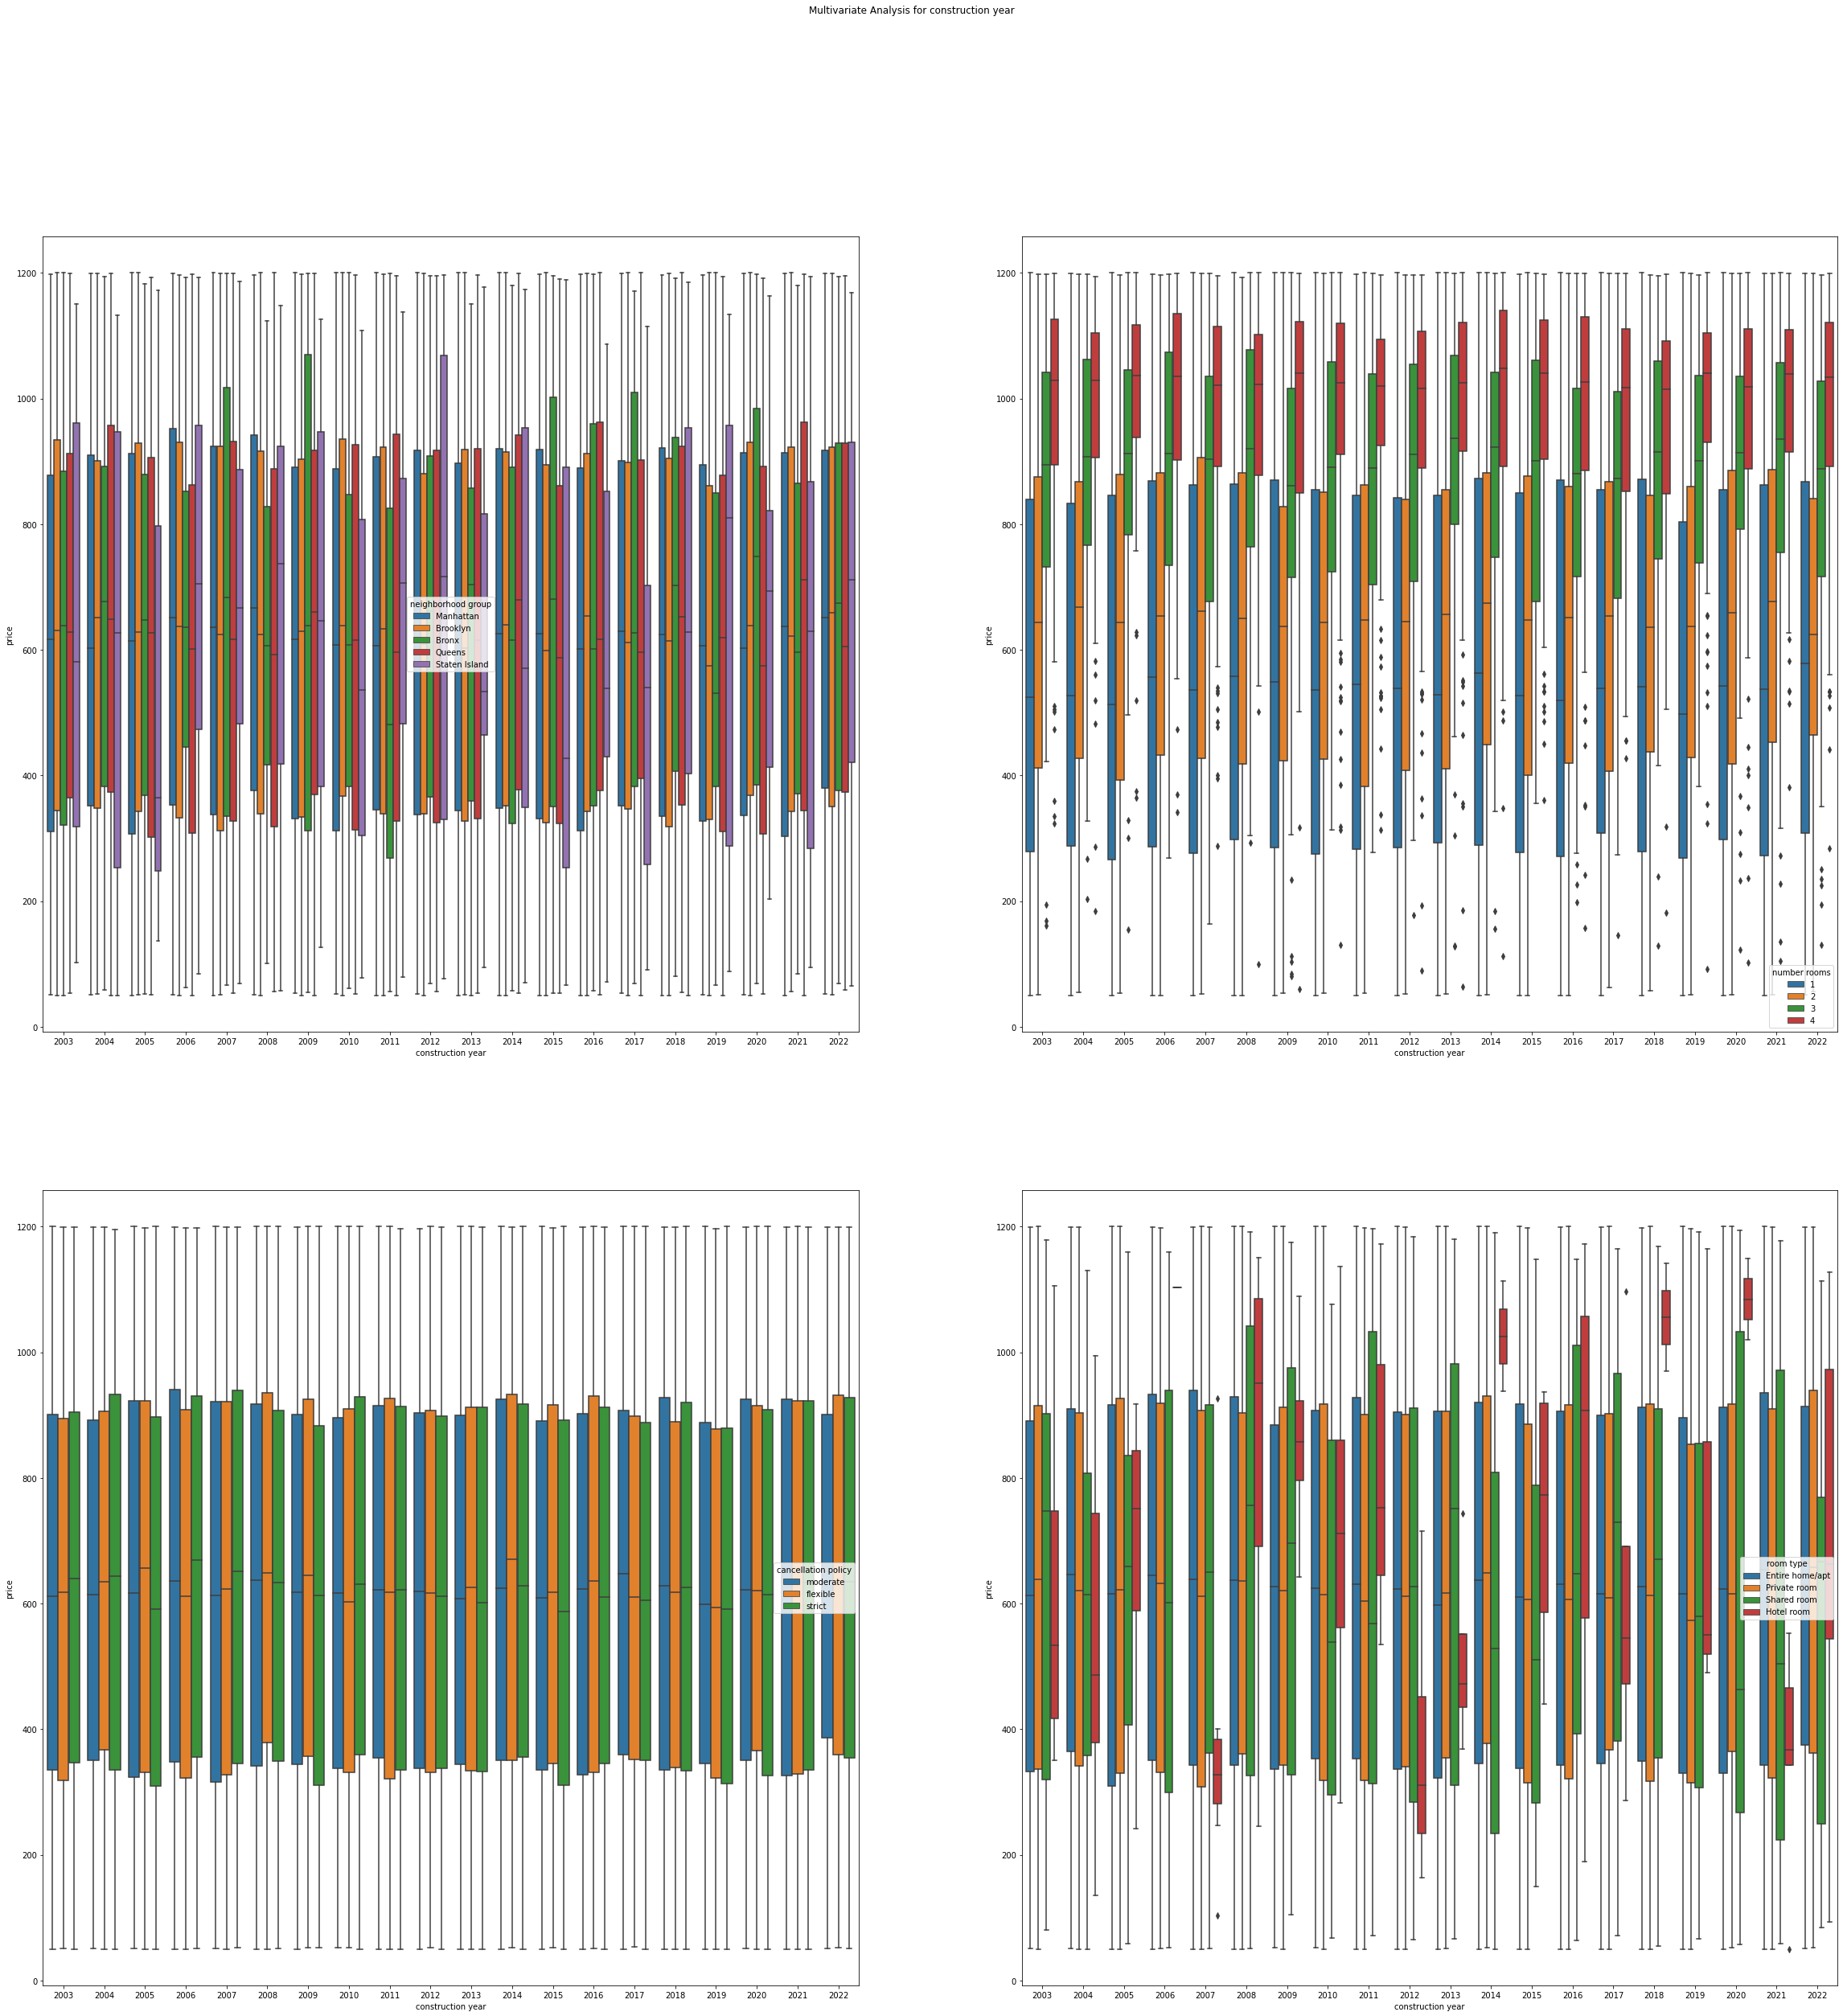

In [22]:
# Your answer goes here
display_multivariate_analysis("construction year")

_Answer:_

1. The combination of **number rooms** and **construction year** has high variance. However, this variation is mostly due to the change in number of rooms.
2. The combination of **room type** and **construction year** also seems to yield variance, especially for the value of *hotel room* for **room type**.
3. The combination of **neighborhood group** and **construction year** could result to some insight for certain neighborhood groups and specific years due to the variation in price values.
4. The combination of **cancellation policy** and **construction year** does not provide considerable insight for price estimation, as there's no significant variation in price values based on the different construction years and cancellation policies combined together.


### **Feature Selection Using Chi-Square Test**

As a final approach, we are going to perform a chi-squared test for feature selection. The test works by defining a hypothesis and calculating the chi-square statistic using the expected and the observed values. Finally, we accept or reject the null hypothesis. we need to determine the relationship between the independent category feature (predictor) and the dependent category feature(response). In feature selection, we aim to select the features which are highly dependent on the response.

- Null Hypothesis: Two variables are independent.

- Alternate Hypothesis: Two variables are not independent.

Reference: https://towardsdatascience.com/chi-square-test-for-feature-selection-in-machine-learning-206b1f0b8223

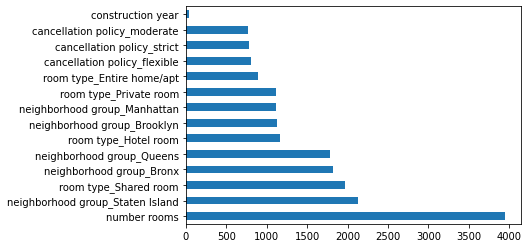

In [23]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Define the features we are considering as candidates
features = ["neighborhood group", "construction year", "number rooms", "cancellation policy", "room type"]

filtered_df = airbnb_cleaned_df[features]

# Encode the categorical features
encoded_df = pd.get_dummies(filtered_df, columns=['room type', 'neighborhood group', 'cancellation policy'])

X = encoded_df.copy()
y = airbnb_cleaned_df["price"]

# Define the feature selection model, which uses the chi square test and selects the 5 best features
feature_selection_model = SelectKBest(score_func=chi2, k=5)
# Fit the feature selection model to the data
feature_selection_model=feature_selection_model.fit(X,y)
top_features=feature_selection_model.transform(X)

# Plot the top features selected by the chi square test
feature_selection_model.scores_= pd.Series(feature_selection_model.scores_, index=X.columns)
feature_selection_model.scores_.nlargest(15).plot(kind="barh")
plt.show()

### Selection of Variables

Please argue: Which combinations of variables would you consider for pricing your AirBnB?

_Answer:_

By observing the plots drawn above, the combination of **number rooms** with other features seems to be the most informative. Besides the multivariate analysis for **room type** also indicates that the combination of this feature with other features gives insights about the price value. The feature **neighborhood group** is also informative in the sense that it causes variation in price values when compared with the other variables. The univariate and multivariate analysis along with the chi-square test performed above also confirm that the features **number rooms**, **room type**, and **neighborhood group** seem to be the most insightful features for price estimation. The feature **cancellation policy** does not seem to cause considerable variation itself. Besides, the feature **construction year** has provided different results based on the various experiments we have done. However; in general, this feature is not quite insightful for price estimation.

## Question 2: Setting the Price

No matter what you have deducted from your analysis, from now on, you will continue only with three features: **The number of rooms, the neighborhood group, and the room type.**

**Enter Toby**: Toby is your long-term friend back from studying at RWTH. While you studied computer science, Toby studied business administration to become a big shot at Wall Street. He currently works in the back office of some swiss credit institute just across the corner from your office. You decide to drop by and get some of his input for your pricing decision. 

Toby proposes to first use comparables pricing to price your apartment. Comparables pricing is an established concept in economics and means that you price your apartment close to similar apartments. 
You will use different techniques to find similar apartments and set a price.

## Baseline

First, you want to set a baseline to compare against. The baseline should always use the average price of all apartments as a recommended price. Evaluate on a test set of 5%. The same test set should also be used later (you can use the random_state argument in scikit learn's train_test_split, but you need to stay consistent for different questions).

In [24]:
# Your answer goes here
compact_df = airbnb_cleaned_df[['number rooms', 'neighborhood group', 'room type', 'price']]
# Set the descriptive and target features
X = compact_df[['number rooms', 'neighborhood group', 'room type']]
y = compact_df['price']
# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)
# Calculate the average price of the training set in order to use as a baseline
baseline = y_train.mean()
y_test_mean = y_test.mean()
print(f"Baseline (Average Price): {baseline}")
print(f"Test Mean: {y_test_mean}")
# Consider the mean value of the prices of all instances in the training set as the prediction
predictions = np.repeat(baseline, X_test.shape[0])
mae_base = mean_absolute_error(predictions, y_test.values)
print(f"Mean Absolute Error: {mae_base}")

Baseline (Average Price): 624.929018261787
Test Mean: 635.6195314705052
Mean Absolute Error: 286.52832633529397


## Decision Tree

Using a decision tree, you try to price your apartment according to similar apartments. 

In the following, we want to know the price ranges for renting AirBnBs. To use decision trees, you need to discretize prices. We use the following price bins:


- [50, 200]
- (200, 400]
- (400, 600]
- (600, 800]
- (800, 1000]
- (1000, 1200]

We add the attribute "Price_Bins" using the discretization mentioned above for each apartment. For example, if an apartment costs 404, it is put into the bin (400, 600].

In [25]:
# Your answer goes here

# Define the bin intervals
bins = [50, 200, 400, 600, 800, 1000, 1200]
# Define interval labels
bin_labels = ['[50, 200]', '(200, 400]', '(400, 600]', '(600, 800]', '(800, 1000]', '(1000, 1200]']
# Perform the binning
price_bins = pd.cut(compact_df['price'], bins, include_lowest=True, labels=bin_labels)
extended_df = compact_df.copy()
# Add the price bins to the dataframe
extended_df['Price_Bins'] = price_bins.values
display(extended_df)

number rooms neighborhood group        room type  price    Price_Bins
0                 2          Manhattan  Entire home/apt    142     [50, 200]
1                 1          Manhattan     Private room    620    (600, 800]
2                 2           Brooklyn  Entire home/apt    368    (200, 400]
3                 1          Manhattan  Entire home/apt    204    (200, 400]
4                 1           Brooklyn     Private room     71     [50, 200]
...             ...                ...              ...    ...           ...
70837             1             Queens     Private room    103     [50, 200]
70838             1             Queens     Private room    982   (800, 1000]
70839             1             Queens     Private room    946   (800, 1000]
70840             1          Manhattan  Entire home/apt   1043  (1000, 1200]
70841             1           Brooklyn  Entire home/apt    809   (800, 1000]

[70842 rows x 5 columns]

Consider the extended dataset from the previous task. Use 'number rooms,' 'room type,' and 'neighborhood group' as descriptive features and "Price_Bins" as the target feature. Create a test and training set like before.

In [26]:
# Your answer goes here
X_ext = extended_df.drop(columns=['price', 'Price_Bins'])
y_ext = extended_df['Price_Bins']
# Convert features to string type for future usage (one-hot encoding)
X_ext = X_ext.astype(str)
y_ext = y_ext.astype(str)
# Random state used as before, so that the train and test sets are split as before
X_train_ext, X_test_ext, y_train_ext, y_test_ext = train_test_split(X_ext, y_ext, test_size=0.05, random_state=42)

Generate a decision tree in which the minimum number of samples for splitting is ten and use entropy. What is the system's entropy?

Note: For this task, you must use the p_decision_tree library.

In [27]:
# Your answer goes here

# Prepare the descriptive and target features
descriptive_features = X_ext.columns
data_descriptive = X_train_ext.values
data_label = y_train_ext.values

# Calling DecisionTree constructor (the last parameter is criterion which can also be "gini")
decisionTree = DecisionTree(data_descriptive.tolist(), descriptive_features.tolist(), data_label.tolist(), "entropy")

# Here you can pass pruning features (gain_threshold = 0 and minimum_samples = 10)
min_samples = 10
decisionTree.id3(0, min_samples)

# Visualizing decision tree by Graphviz
dot = decisionTree.print_visualTree( render=True )

print("System entropy: ", format(decisionTree.entropy))

System entropy:  2.5769427958177795


**Note**: Due to potential restrictions for visualizing the decision tree output, we have provided the image for the generated output of the decision tree.

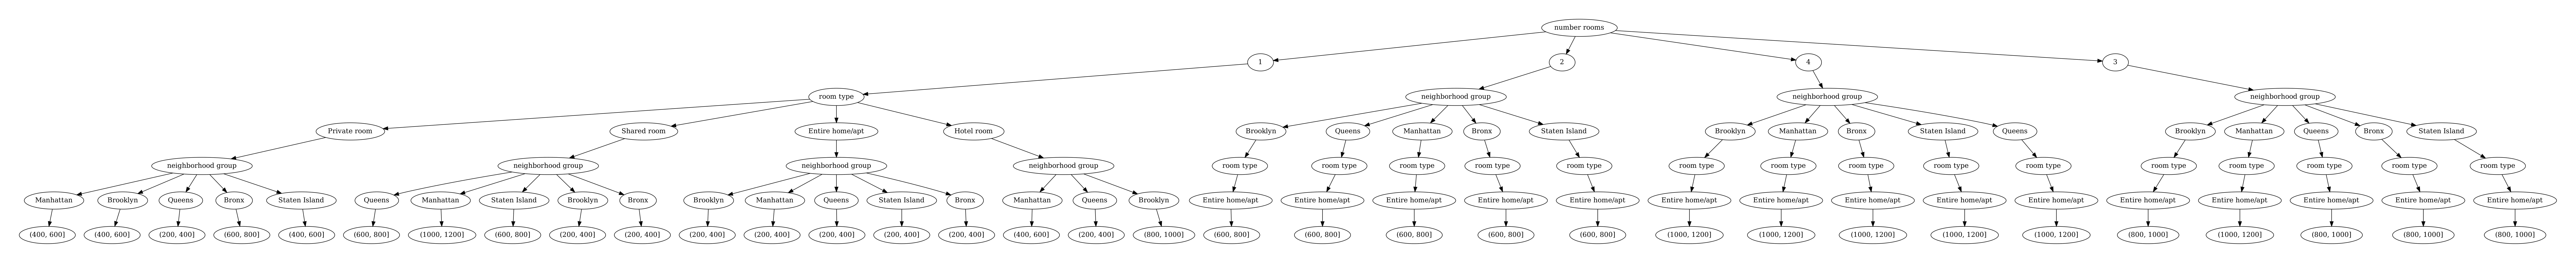

What is the first feature the decision tree splits on?

_Answer:_ **number rooms** is the first feature on which the decision tree splits.

Since it doesn't make sense to set a price range for renting a room, we need to fix a price. For simplicity, we use the means of the bins, i.e., 125, 300, 500, 700, 900, and 1100. For example, if a room were categorized in the bin (200, 400], it would have the price of 300.

What prices are possible given your decision tree for:

- Manhattan, 1-room, Private room
- Staten Island, 1-room, Shared room

_Answer:_

1. For the first case, i.e. *Manhattan, 1-room, Private room*, the proposed price of the decision tree lies in bin **(400, 600]**; therefore, we consider the price equal to **500**.

2. For the second case, i.e. *Staten Island, 1-room, Shared room*, the proposed price of the decision tree lies in bin **(600, 800]**; therefore, we consider the price equal to **700**.


What is the proposed price of the decision tree for our apartment? Store it in a variable for later usage.

In [33]:
# Your answer goes here
# Manhattan, 2-room, Apartment
# Lies in bin (600, 800]; therefore, we consider the price equal to 700
# Price predicted by decision tree (Later usage)
apt_instance = {'number rooms': '2', 'neighborhood group': 'Manhattan', 'room type': 'Entire home/apt'}
decision_tree_pred = 700

To evaluate how good our decision tree is for determining price categories, we want to measure the error of the predictions on the test set. To do so, the IDS team provided you helper functions below.

In [34]:
import pydotplus
import networkx

def get_name_value_dict(graph):
    id_label_dict = {}
    root = decisionTree.root
    visited = set() # Set to keep track of visited nodes of graph.

    def dfs(visited, graph, node):#function for dfs 
        id_label_dict[node.name] = node.value
        if node not in visited:
            if node.next:
                id_label_dict[node.next.name] = node.next.value
            visited.add(node)
            if node.childs:
                for child in node.childs:
                    if child is not None:
                        dfs(visited, graph, child)
            elif node.next:
                if node.next.childs:
                    for child in node.next.childs:
                        if child is not None:
                            dfs(visited, graph, child)
    dfs(visited, decisionTree, root)
    return id_label_dict

def get_predictor(tree):
  id_label_dict = get_name_value_dict(tree)
  dotplus = pydotplus.graph_from_dot_data(tree.source)
  G = networkx.nx_pydot.from_pydot(dotplus)
  root = [n for n,d in G.in_degree() if d==0][0]
  paths = []
  for node in G:
      if G.out_degree(node)==0: #it's a leaf
          paths.append(networkx.shortest_path(G, root, node))
  new_paths = []
  for path in paths:
      for name, value in id_label_dict.items():
          path = ([p.replace(name, value) for p in path])
      new_paths.append(path)
  predictor = {}
  for path in new_paths.copy():
    target = path[-1]
    classification = tuple(path[:-1])
    predictor[classification] = target
  return predictor

def get_prediction_features(predictor):
    features = set()
    for key in predictor:
        i = 0
        while i <= len(key)-2:
            features.add(key[i])
            i +=2
    return features
            
def get_predicted_bin(instance, features, predictor):
  feature_values = {}
  for feature in features:
      feature_values[feature] = instance[feature]
  possible_paths = predictor.keys()
  i=0
  while i<=len(feature_values):
    attribute = [path[i] for path in possible_paths][0]
    if attribute in predictor.values():
      break
    feature_value = feature_values[attribute]
    candidates = []
    for el in possible_paths:
      if str(el[i+1]) == str(feature_value):
        candidates.append(el)
    possible_paths = candidates.copy()
    i+=2
  return predictor[possible_paths[0]]



### Dot is your visual decision tree. Adjust the naming if needed
predictor = get_predictor(dot)
features = get_prediction_features(predictor)

To predict the price bin for each instance of your test set, apply the function get_predicted_bin using the variables *predictor* and *features* provided above.

In [35]:
# Your answer goes here

# Convert the test dataframe to a list of records of type dictionary
test_records_X = X_test_ext.to_dict('records')
test_records_y = y_test_ext.values

print(f'Total Count: {len(test_records_X)}')
misprediction_count = 0
predicted_values = []
# Predict the price on the test data using the decision tree
for index, instance in enumerate(test_records_X):
    # Find the predicted value of the decision tree for an instance in the test dataset
    predicted = get_predicted_bin(instance, features, predictor)
    # Get the real price value of that instance
    real_value = test_records_y[index]
    if predicted != real_value:
        misprediction_count += 1
    # Extract the lower and higher bounds of the interval
    interval_values = re.findall('[0-9]+', predicted)
    interval_values = list(map(lambda value: int(value), interval_values))
    # Calculate the mean value of the interval: (lower_bound + upper_bound) / 2
    interval_mean = sum(interval_values) / 2
    predicted_values.append(interval_mean)
    # print(f'Predicted: {predicted}, Real: {real_value}')

print(f'Mispredicted Interval Count: {misprediction_count}')

apt_predicted_bin = get_predicted_bin(apt_instance, features, predictor)
apt_predicted_bin_intervals = re.findall('[0-9]+', apt_predicted_bin)
decision_tree_pred = sum(list(map(lambda value: int(value), apt_predicted_bin_intervals))) / 2
print(f"Price predicted by decision tree for our apartment: {decision_tree_pred}")

Total Count: 3543
Mispredicted Interval Count: 2698
Price predicted by decision tree for our apartment: 700.0


You predicted a price range for AirBnBs in your test set. However, since you cannot enter a price range for renting an apartment, we have to map the range of bins to one value. To do so, we use the mean of bins, as explained before, to predict the price. Given that, compute the mean absolute error between the prediction from the decision tree and the real price provided in the dataset. What is the mean absolute error?

In [36]:
# Your answer goes here
predicted_values = np.array(predicted_values)
# Calculate the mean absolute error between the predicted price values and their real values
mae_dec_tree = mean_absolute_error(predicted_values, y_test.values)
print(f"Mean Absolute Error for Decision Tree: {mae_dec_tree}")

Mean Absolute Error for Decision Tree: 269.7533163985323


## Clustering

Another way to do comparables pricing is to find similar apartments using clustering. Each calculated cluster represents one or more similar apartments in the dataset. For each cluster, you calculate the mean price as a representative price. To predict the price for new apartments, you assign them to an existing cluster and give the mean price as prediction.

Use the same features you used in the decision tree for the clustering as well (**number rooms, neighborhood group, room type**), and remember that your dataset is still split into a training and test set.

In this task, you will use the k-means algorithm.
*Note: To keep results comparable, please use 100 for random state and n_init when initializing the clustering algorithm. Also, remember to use the same test and training set as in the previous tasks to compare performances.*

### Encoding 

K-means tries to calculate the distance between different data points. Since some of the features you want to use are not numeric, apply one-hot encoding to be able to use distance measures. Use the preprocessing module of sklearn to prepare your dataset for clustering.

### Investigating the Type of Features

We are going to use only a subset of the features provided in the dataset as the descriptive features, and we need to decide on whether they are categorical and need to be encoded or not. Below, we summarize our findings and final conclusion:

1. Following the definiton of numeric values, we find that a feature is numeric if we can apply numeric relationships and arithmetics (such as min, max, mean, sum, etc.). For instance, number of items could be considered as a discrete numeric value. Here we consider the 'number rooms' feature as a numerical feature, since it makes sense to differentiate between different number of rooms in a mathematical way, e.g. 2 < 4 has a clear meaning when comparing the number of rooms.

2. The features 'neighborhood group' and 'room type' are obviously categorical features and need to be encoded so that they are represented with numerical values.

It's important to note that number of rooms could be considered as a categorical feature as well due to its limited range (1 to 4); however, dues to our first explanation and the fact that it does not capture the difference of two instances quite accurately (1), we have decided to consider it as a numerical feature.

(1) We clarify this statement by the following example:
Suppose we one-hot encode number of rooms, the result is as below:
- 1 -> 1 0 0 0
- 2 -> 0 1 0 0
- 3 -> 0 0 1 0
- 4 -> 0 0 0 1

in this case, the distance (*our focus is mostly on the euclidean distance*) between 1 and 4 will be the same as the distance between 1 and 2. Therefore, the distance between the two values are not well-distinguished.

In [184]:
# Your answer goes here

encoder = OneHotEncoder(categories='auto')
# Fit the encoder to the whole dataset
encoder.fit(X_ext[['neighborhood group', 'room type']])
# Apply the one hot encoder
X_train_enc = encoder.transform(X_train_ext[['neighborhood group', 'room type']]).toarray()
print('Transformed by One-hot Encoding: ')
"""
Each array for each instance includes 9 encoded elements because there are 5 distinct values for 'negihborhood group' and 4 distinct values for 'room type'
There's also a numerical value, which is the number of rooms
In total, each instance has 10 elements
"""

X_train_enc = np.concatenate((X_train_ext['number rooms'].astype('int32').values.reshape(-1, 1), X_train_enc), axis=1)
display(X_train_enc)
print(f"Shape of the transformed data: {X_train_enc.shape}")

Transformed by One-hot Encoding: 


array([[1., 0., 0., ..., 0., 1., 0.],
       [2., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       ...,
       [1., 1., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.]])

Shape of the transformed data: (67299, 10)


### Choosing number of clusters

In k-means, the number of wanted clusters is a parameter one can decide on. Since this is information you do not have at this time, you choose to use the data to decide.

You cluster on the training dataset by using `k` number of clusters where `k` is between 4 and 15. Since you are interested in the price, for each clustering, you calculate the **standard deviation of the mean prices for the clusters**. Therefore, for each clustering:
1. Calculate the mean price for each of the resulting clusters.
2. Calculate the standard deviation of the mean prices calculated in 1.

Plot a diagram where on the `x-axis` you will have the *number of clusters used* and on the `y-axis` the *standard deviation of the means*.

In your opinion, which amount of clusters makes more sense? Explain your answer.

In [38]:
# Your answer goes here

# Initialize values for later usage
min_clusters = 4
max_clusters = 15
cluster_std = {}
target_model = None
target_model_cluster_means = None
sum_of_squared_distances = []
silhouette_avg = []
for num_clusters in range(min_clusters, max_clusters + 1):
    print(f"K-Means Clustering with {num_clusters} Clusters")
    # Train the K-Means clustering with a specific number of clusters
    kmeans = KMeans(n_clusters=num_clusters, n_init=100, random_state=100).fit(X_train_enc)
    # Get the indices of the instances/smaples assigned to each cluster (with key being the cluster number and the value being the array of sample indices)    
    # Format: {cluster: array of indices} -> {0: [1, 4, 5, ...], 1: [0, 2, ...], ...}
    cluster_indices = {cluster_num: np.where(kmeans.labels_ == cluster_num)[0] for cluster_num in range(kmeans.n_clusters)}
    # Get price values corresponding to the samples of each cluster
    cluster_prices = {cluster_num: y_train.values[cluster_indices[cluster_num]] for cluster_num in cluster_indices}
    # Get the one-hot encoded samples assigned to each cluster
    cluster_samples = {cluster_num: X_train_enc[cluster_indices[cluster_num]] for cluster_num in cluster_indices}
    # Keep track of sum of squared distances between cluster centroids and their samples (used later for the elbow method analysis)
    sum_of_squared_distances.append(kmeans.inertia_)
    # Keep track of silhouette scores for each number of clusters
    silhouette_avg.append(silhouette_score(X_train_enc, kmeans.labels_))
    # Calculate and assign the mean value of prices for each cluster
    cluster_means = {}
    for cluster_num in cluster_prices:
        cluster_means[cluster_num] = cluster_prices[cluster_num].mean()
    price_std = np.array(list(cluster_means.values())).std()
    # Keep track of number of clusters used and the standard deviation of the mean values of the prices
    cluster_std[num_clusters] = price_std
    # Saving the model and its cluster samples with 9 clusters for the next task
    if num_clusters == 9:
        target_model = kmeans
        target_model_cluster_means = cluster_means
        

K-Means Clustering with 4 Clusters
K-Means Clustering with 5 Clusters
K-Means Clustering with 6 Clusters
K-Means Clustering with 7 Clusters
K-Means Clustering with 8 Clusters
K-Means Clustering with 9 Clusters
K-Means Clustering with 10 Clusters
K-Means Clustering with 11 Clusters
K-Means Clustering with 12 Clusters
K-Means Clustering with 13 Clusters
K-Means Clustering with 14 Clusters
K-Means Clustering with 15 Clusters


Standard Deviation for Different Numbers of Clusters: {4: 151.22771321379435, 5: 136.72854436589967, 6: 125.87974047703351, 7: 127.9537369497307, 8: 128.32730225878947, 9: 139.07379937360398, 10: 147.99018401714923, 11: 141.6786497318206, 12: 155.89006113362706, 13: 149.53442275413454, 14: 159.72658377829518, 15: 162.6531717327376}


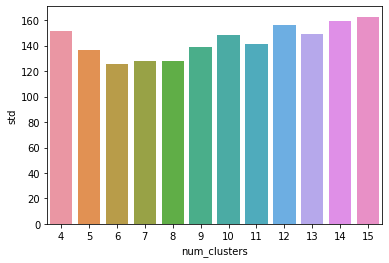

In [42]:
print(f"Standard Deviation for Different Numbers of Clusters: {cluster_std}")
cluster_std_df = pd.DataFrame({'num_clusters': cluster_std.keys(), 'std': cluster_std.values()})
sns.barplot(x='num_clusters', y='std', data=cluster_std_df);

### **Peripheral Explanatory Analysis for Choosing Number of Clusters**

**1. Elbow Method:**


In addition to computing the standard deviation of the mean price values when different numbers of clusters are used as a way of finding the best number of clusters, finding the *sum of squared distances (inertia)* of the cluster points to their centroids could also be a useful and insightful analysis for obtaining the best number of clusters.
To better understand how the elbow method works and helps us through finding the appropriate number of clusters, we should consider the following argument.

We calculate WCSS ( Within-Cluster Sum of Squares ). WCSS is the sum of squared distance between each point and the centroid in a cluster. When we plot the WCSS with the K value, the plot looks like an Elbow. As the number of clusters increases, the WCSS value will start to decrease. WCSS value is largest when K = 1. When we analyze the graph we can see that the graph will rapidly change at a point and thus creating an elbow shape. From this point, the graph starts to move almost parallel to the X-axis. The K value corresponding to this point is the optimal K value or an optimal number of clusters.

In the graph drawn below, we can see that as the number of clusters exceeds 10, the slope starts to decrease; therefore, we can see that **10 clusters** could be the optimal choice for the number of clusters to use.

**Note:** Despite the fact that the WCSS continues to decrease as we increase the number of clusters beyond 10, we do not consider them as the optimal choice because that could imply our model is not generalizing very well and could be prone to overfitting.

**2. Silhouette Analysis:**

The silhouette coefficient or silhouette score is a measure of how similar a data point is within-cluster (cohesion) compared to other clusters (separation). Therefore, it takes into account the main goal of clustering, which is to group similar instances under the same cluster and maximize the difference between instances which are in different clusters.

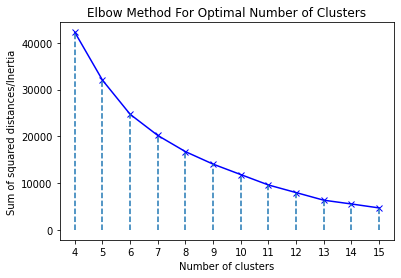

In [43]:
# Plot the inertia computed for different numbers of clusters (Elbow Method Analysis)
plt.plot(np.arange(min_clusters, max_clusters + 1, 1), sum_of_squared_distances, '-bx')
plt.vlines(np.arange(min_clusters, max_clusters + 1, 1), 0, sum_of_squared_distances, linestyle="dashed")
plt.xticks(np.arange(min_clusters, max_clusters + 1, 1))
plt.xlabel("Number of clusters") 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal Number of Clusters')
plt.show()

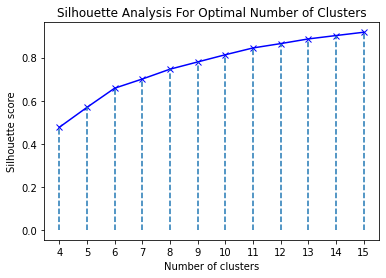

In [44]:
# Plot the Silhouette score for different numbers of clusters (Silhouette Analysis)
plt.plot(np.arange(min_clusters, max_clusters + 1, 1), silhouette_avg, 'bx-')
plt.vlines(np.arange(min_clusters, max_clusters + 1, 1), 0, silhouette_avg, linestyle="dashed")
plt.xticks(np.arange(min_clusters, max_clusters + 1, 1))
plt.xlabel("Number of clusters")
plt.ylabel('Silhouette score')
plt.title('Silhouette Analysis For Optimal Number of Clusters')
plt.show()

_Answer:_

In order to answer this question, it's best that we refer to an important concept in clustering in general:
-  The points **within a cluster** should have **minimum distance** to each other.
-  The points from **different clusters** should have **maximum distance** to each other.

Following this, we observe that K-Means clustering with **14 clusters** results in the **highest standard deviation** across the mean price values (which is satisfactory); therefore, we can conclude that the samples assigned to different clusters are dissimilar. It also seems to be the best choice based on the **Elbow Method** and **Silhouette Analysis**. However, this can imply that the model has overfit to the data and is not well-generalized. Besides, considering the elbow method, we can argue that the optimal choice for the number of clusters is the point where the slope of the graph displays a considerable variation. Therefore, we can conclude that the optimal number of clusters is roughly **9** or **10**. Note that samples in each cluster are similar to each other since their sum of squared distances to their centroids are almost low compared to other numbers of clusters used for clustering and the standard deviation of the mean price values of the clusters (with 9 or 10 clusters) is sufficiently high. The **Silhouette score** computed for these numbers of clusters are also high enough to be considered as good choices for the number of clusters **without being prone to overfitting**.

**Conclusion**: Using **9 or 10 clusters** makes more sense.

**Note:** No matter the conclusion made in the previous task, from now on, you use the clustering model with **9 clusters** for predicting the price for your apartment and evaluating the clustering technique.

### Pricing your apartment

To predict the price for your apartment, calculate in which cluster your apartment would be and use the mean value of the cluster as a possible price.

In [186]:
# Your answer goes here

# Create dataframe for our apartment
apt_df = pd.DataFrame({'number rooms': 2, 'neighborhood group': 'Manhattan', 'room type': 'Entire home/apt'}, index=[0])
# Apply one-hot encoding to our apartment's dataframe
apt_df_enc = encoder.transform(apt_df[['neighborhood group', 'room type']]).toarray()
apt_df_enc = np.concatenate((apt_df['number rooms'].values.reshape(-1, 1), apt_df_enc), axis = 1)
# Get the cluster label/number for our apartment
prediction = target_model.predict(apt_df_enc)
prediction = prediction[0]
# Price predicted by clustering (Later usage)
clustering_pred = cluster_means[prediction]
print(f"Model with 9 clusters predicts the apartment to be assigned to cluster {prediction}")
print(f"Cluster {prediction} Mean Value: {cluster_means[prediction]}")

Model with 9 clusters predicts the apartment to be assigned to cluster 6
Cluster 6 Mean Value: 629.9505717447437


### Evaluating clustering

You want to evaluate how well your clustering worked. In your case, two things can be evaluated:

1.   Whether the clustering technique can group similar apartments together
2.   Whether other people determine the price of their apartment as you did, meaning whether similar apartments get a similar price

You are going to evaluate the clustering technique visually. The IDS team provides you with the following fancy code that reduces your input to two dimensions.

In [46]:
import umap.umap_ as umap

#Preprocessing numerical
full_data = X_train # use the train dataset here
numerical = full_data.select_dtypes(exclude='object')

for c in numerical.columns:
    pt = sklearn.preprocessing.PowerTransformer()
    numerical.loc[:, c] = pt.fit_transform(np.array(numerical[c]).reshape(-1, 1))
    
##preprocessing categorical
categorical = full_data.select_dtypes(include='object')
categorical = pd.get_dummies(categorical)

#Percentage of columns which are categorical is used as weight parameter in embeddings later
categorical_weight = len(full_data.select_dtypes(include='object').columns) / full_data.shape[1]

#Embedding numerical & categorical
fit1 = umap.UMAP(metric='l2').fit(numerical)
fit2 = umap.UMAP(metric='dice').fit(categorical)

#Augmenting the numerical embedding with categorical
intersection = umap.general_simplicial_set_intersection(fit1.graph_, fit2.graph_, weight=categorical_weight)
intersection = umap.reset_local_connectivity(intersection)
embedding = umap.simplicial_set_embedding(fit1._raw_data, intersection, fit1.n_components,
                                                fit1._initial_alpha, fit1._a, fit1._b,
                                                fit1.repulsion_strength, fit1.negative_sample_rate,
                                                200, 'random', np.random, fit1.metric,
                                                fit1._metric_kwds, False, {}, False)

# Extracting the resulting dimensions
dimension1 = embedding[0].T[0]
dimension2 = embedding[0].T[1]

/home/sandman/anaconda3/envs/env-IDS2022-23/lib/python3.9/site-packages/umap/umap_.py:1802: UserWarning: gradient function is not yet implemented for dice distance metric; inverse_transform will be unavailable
  warn(


Create a scatter plot from the two dimensions and use the cluster labels for coloring the data points. Use the train set for the visualization. Discuss the result.

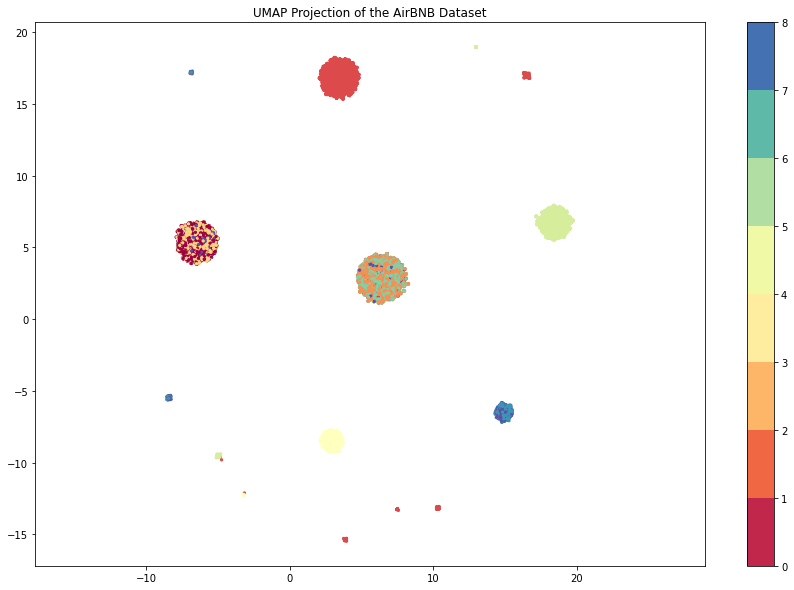

In [64]:
# Your answer goes here

fig = plt.figure(figsize=(15, 10))
plt.scatter(
    dimension1,
    dimension2,
    c=target_model.labels_,
    cmap='Spectral',
    s=5,
)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(9)).set_ticks(np.arange(9))
plt.title('UMAP Projection of the AirBNB Dataset', fontsize=12);

_Answer:_

### **Analysis of the UMAP Plot**

Our analysis of the embedding scatterplot results in the following statement:

1. Some of the clusters appear in different places along the embedding scatterplot; therefore, this could lead to different prediction results for the instances with the same cluster label. However, the density of some of the similar clusters is mostly high, i.e., similar instances within these clusters get similar prediction results. 

2. Some of the  clusters are clearly distinguishable, so it seems that instances from different clusters are dissimilar to other clusters (instances from different clusters are distant).

3. Some of the clusters are not homogeneous, i.e, some of the clusters consist of dissimilar data points (points with different cluster labels). However, most of the clusters seem to be homogeneous and include data points with similar cluster labels. Note that the dimensionality of the data points have been reduced so that we are able to plot and visualize the points, and this might have caused the variation in the positioning of data points with same cluster labels.


We next evaluate whether similar apartments (considering the attributes we chose) get similar prices. To do this, we use our test set. Assign each apartment of the test set to the nearest centroid. Predict the price of the apartments in the test set by taking the mean price of the cluster they was assigned to. Calculate the mean absolute error between the predicted and real prices.

In [65]:
# Your answer goes here

# Apply one-hot encoiding to test dataset
X_test_enc = encoder.transform(X_test_ext[['neighborhood group', 'room type']]).toarray()
X_test_enc = np.concatenate((X_test_ext['number rooms'].astype('int32').values.reshape(-1, 1), X_test_enc), axis = 1)
predictions = target_model.predict(X_test_enc)
# Map each of the cluster points to the mean value
map_to_cluster_mean = lambda x: target_model_cluster_means[x]
# Map each prediction to the mean of the cluster it represents
y_pred = np.vectorize(map_to_cluster_mean)(predictions)
# Calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred, multioutput='raw_values')
print(f"Mean Absolute Error: {mae[0]}")

Mean Absolute Error: 262.1563673393873


### Final comments on the price prediction

Please compare the three approaches used for determining the price. Do they provide a good way of determining the price?

_Answer:_

#### Part 1: Comparative Analysis of the Approaches

For the **first part of the question**, we provide a comparative analysis of the approaches we have taken so far.

1. **Baseline**: With this approach, we always use the mean values of prices of all apartments as the predicted value. The *mean absolute error* obtained on the test set using this approach is **286.5057611400047**.

2. **Decision Tree**: After evaluating the decision tree on the test set, we observed that there were 2698 inaccurate interval predictions out of the 3543 total instances in the test data. We obtained a *mean absolute error* of **269.7533163985323** on the test set using the decision tree.

3. **Clustering**: We used 9 different clusters to group the data in the training set based on the features required, although there could be other choices for the number of clusters, but they might have been prone to overfitting. Finally, by assigning the instances in the test set to the nearest centroid and using the mean value of each centroid as the predicted value for each instance, we obtain a *mean absolute error* of **262.1563673393873**.

By comparing the errors we obtained using each of these different approaches, we see that the **baseline method** leads to the highest mean absolute error. the **clustering method**, however, results in the lowest error and could be considered as the best approach compared to the other approaches. The approach used by **decision tree**, in which the predictions are based on the mean price values of the interval to which the instances are assigned, results in an error value in between the baseline and the decision tree.

Note that the errors obtained on the test data for each of these approaches are rather high; therefore, the predictions made by each of these methods are somehow unreliable.

#### Part 2: Arguments about the Adequacy of the Approaches

For the **second part of the question**, we argue why we consider these approaches as bad ways of estimating the price.


1. The **baseline method** always predicts the mean price value of the training set as the price for any instance. This approach is indeed inappropriate for price estimation as it does not take into account any of the features provided in the dataset for price estimation.

2. **Decision trees** can be used for both classification and regression tasks. However, this might not be quite appropriate for a **regression task** and **predicting continuous values**, which in this case is the price. If we consider the approach we have taken here, we are returning the mean value of the specified intervals as the prediction for each instance. This method is indeed prone to considerable errors as it can not provide predictions in a continuous sense (i.e., the values that the decision tree can predict for the price are limited to the mean value of the intervals.). In addition, decision trees can become very complex and might not be able to generalize well, which in this can we can say that they are prone to **overfitting**. However, this can be mitigated if we apply certain techniques such as specifying the number of leaves per node and pruning algorithm.

3. The second approach, which is **clustering**, is considered as an **unsupervised learning** technique, i.e. it is often used in the context where we don't have a target feature and we only intend to group similar items together. Our problem  is a **regression task**, which can be categorized as a **supervised learning** problem with a numerical and continuous target feature. Additionally, we are using the K-Means clustering algorithm for this task, which requires us to provide the number of clusters beforehand. This is indeed a down side of the K-means algorithm, and we might not get the best result if we come up with a poor choice for the number of clusters.

To conclude this part, we first compared the three approaches (mainly based on the mean absolute error we obtained on the test set for each approach), and finally we provided reasons why these are **inadequate for price estimation**. As these algorithms are not the most suitable for a regression task it would be better to use a MLPRegressor or linear regression with kernels to perform price prediction.

## Question 3: Investigating Price Elasticity

You show your results to Toby, excited about the price suggestions you got from the decision tree and clustering. You decide to take the higher price, which naturally means more income.

However, he points you to one central flaw in your thinking: The number of bookings is not independent of the price. Therefore, you can not just take any price and assume that this will lead to more income than a lower price, as the demand (utilization) for your apartment might decrease. This is called **price elasticity**.

You want to verify what Toby has been telling you. You extracted the utilization column of your dataset by grabbing the available data from AirBnB's calendar (smart!). The utilization values are contained in dataset **AirBnB_utilization.csv**. **Show several graphs investigating price elasticity.** For example, you might plot the utilization in relation to the price and color according to different variable values. 
After you have verified Toby's statements, you want to learn price elasticity from the dataset (the utilization of an apartment given the price, the number of rooms, the room type, and the neighborhood group, i.e., the same features as before). With the learned price elasticity, you want to evaluate which of the proposed prices (decision tree or clustering) is the better choice.

## Investigation of the Relation between Price and Elasticity

As the plots drawn below clearly indicate, we can not provide a firm argument on how the price affects the utilization since there are cases where we see higher utilization for higher prices and lower utilization for lower prices. However, for the different values of the features, we can mostly see that as the price increases, the utilization decreases. For instance, if we consider the **room type** and **number room** features, we see that if we fix the value for one feature, utilization decreases for higher prices of that specific value for that feature. This is not quite the case for the  **neighborhood group** feature. Note that the plots drawn with respect to different variables and subgroups and the overall plot drawn at the end seem to follow the same behavior; therefore, no Simpson's Paradox is obsereved.

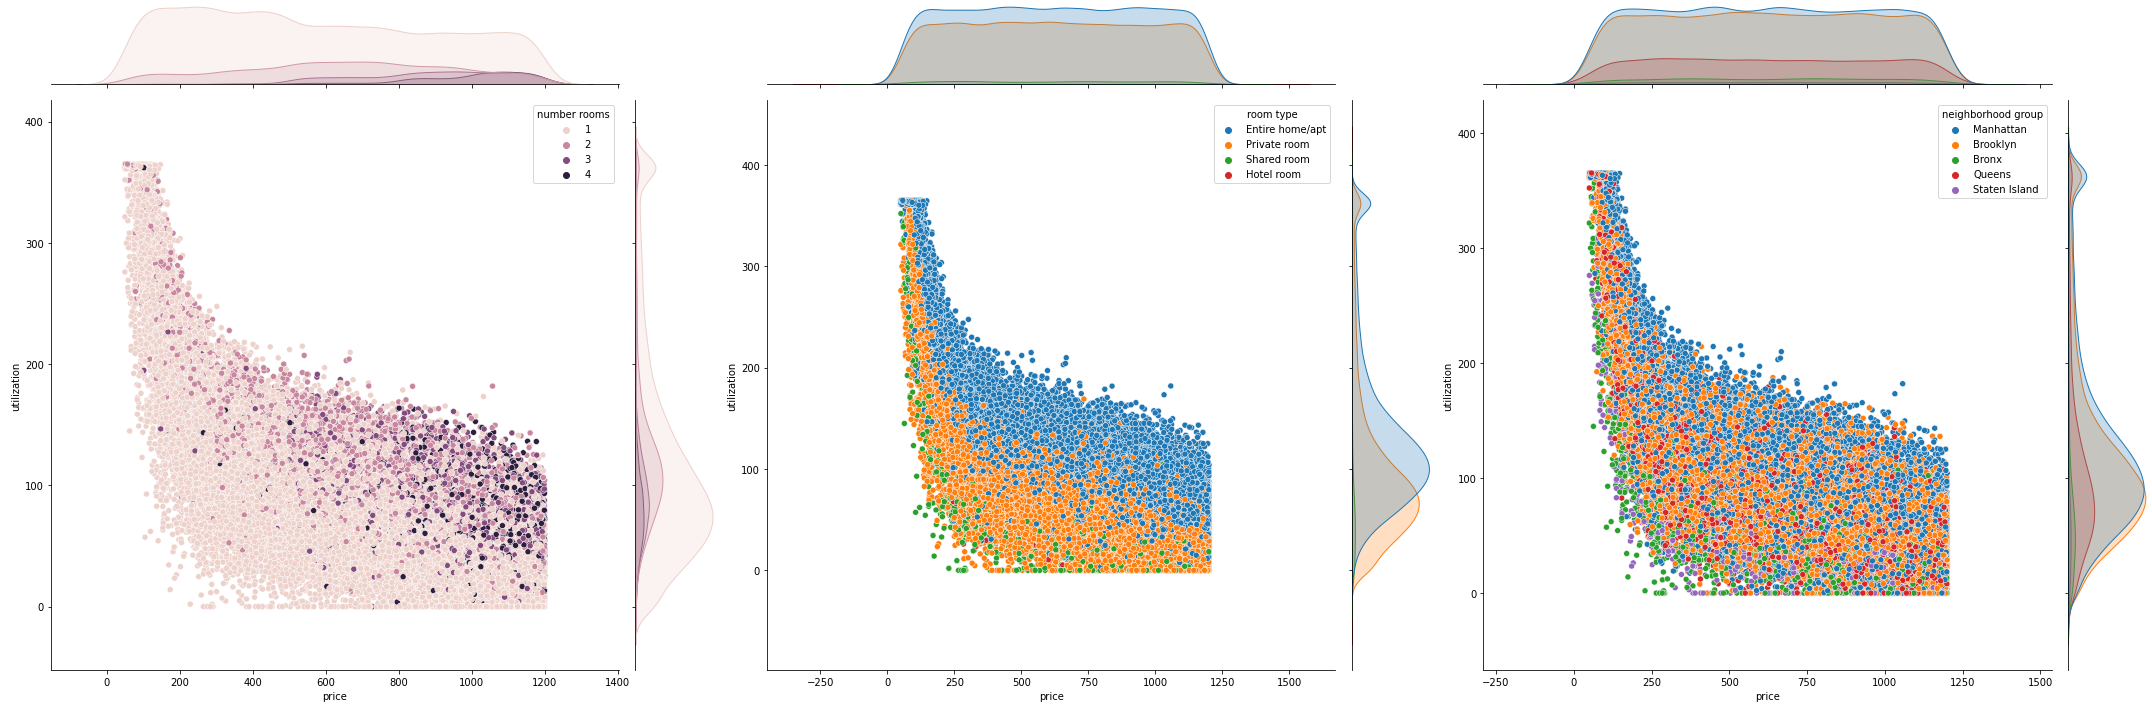

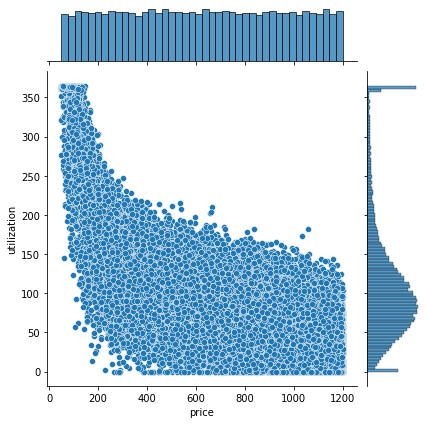

In [62]:
# Your answer goes here

# Load the data containing utilization
utilization_data = pd.read_csv('AirBnB_utilization.csv')

# utilization in relation to price colored by different variable values (hues)
features = ['number rooms', 'room type', 'neighborhood group']
features_count = len(features)
gs = gridspec.GridSpec(1, features_count)
fig = plt.figure(figsize=(features_count * 10, 10))
grid_plots = []
for index, feature in enumerate(features):
    # utilization in relation to price colored by different variable values (hues)
    g = sns.jointplot(data=utilization_data, x='price', y="utilization", hue=feature, kind="scatter");
    SeabornFig2Grid(g, fig, gs[index])

# Overall utilization-price jointplot    
sns.jointplot(data=utilization_data, x='price', y="utilization", kind="scatter");
gs.tight_layout(fig)

You will investigate the relationship between price and utilization in this subtask. First, you will train different models and choose the one that best predicts utilization for an apartment. Second, you will evaluate which of the proposed prices of decision tree and clustering prices were better, assuming that your model provides the correct utilization. Third, you will conclude your investigation and provide a pricing decision.

### Learning price elasticity
You want to use different supervised learning techniques to learn price elasticity. You decide on linear regression, SVM, and multilayer perceptrons. However, you have to preprocess the data. Use the features of the neighborhood group, the room type, the number of rooms, and the price to predict the utilization. Split into training and testing data (test size 5%).

Prepare the data set by splitting, one-hot encoding, and normalizing.

In [232]:
# Your answer goes here

categorical_features = ['neighborhood group', 'room type']
numerical_features = ['number rooms', 'price']

# Splitting the utilization data to descriptive and target features
X = utilization_data[['number rooms', 'neighborhood group', 'room type', 'price']]
# X = utilization_data.drop(columns=['id', 'utilization'])
y = utilization_data['utilization']

X_train_util_init, X_test_util_init, y_train_util, y_test_util = train_test_split(X, y, test_size=0.05, random_state=42)

# Create the one-hot encoder and fit to the utilization data
encoder = OneHotEncoder(categories='auto')
encoder.fit(X_train_util_init[categorical_features])

# Encode the categorical features in the train and test sets
X_train_util_enc = encoder.transform(X_train_util_init[categorical_features]).toarray()
X_test_util_enc = encoder.transform(X_test_util_init[categorical_features]).toarray()

# Create a normalizer instance
normalizer = Normalizer()

min_max_scaler = MinMaxScaler()

# Scale the number of bedrooms and price to a range between 0 and 1
train_normalized = min_max_scaler.fit_transform(X_train_util_init[numerical_features].values)
test_normalized = min_max_scaler.transform(X_test_util_init[numerical_features].values)

# Concatenate the encoded categorical features (neighborhood group and room type) with the normalized numeric values (number of rooms and price)
X_train_util = np.concatenate((train_normalized[:, 0].reshape(-1, 1), X_train_util_enc, train_normalized[:, 1].reshape(-1, 1)), axis=1)
X_test_util = np.concatenate((test_normalized[:, 0].reshape(-1, 1), X_test_util_enc, test_normalized[:, 1].reshape(-1, 1)), axis=1)

For each technique, use 5-cross-fold validation and assess the performance on the test set. 

### Important Considerations Regarding Normalization

1. We are using normalization instead of standardization for the price attribute. Standardization for the price attribute is not quite reasonable since it might lead to negative values, and standardization is often used when the distribution of the values is Gaussian. We are using normalization in order to similarize the range of the the price attribute with the other attributes of the dataset.

2. First, normalization is performed over the training data. Afterwards, normalization is applied to the testing instances as well, but this time using the mean and variance of training explanatory variables. In this way, we can test and evaluate whether our model can generalize well to new, unseen data points.

3. We are using a specific type of normalization, which is also called Min-Max scaling. This type of normalizations ends up in the data ranging between 0 and 1.

It's important to note that we use the normalizer fit to the training set to normalize the test set. The conceptual idea is that test data is supposed to mimic new, previously unseen data after training. If we normalize the test data separately (by finding new min-max pairs), you are “leaking information from the future”. The result is we’d get an overly optimistic evaluation of the prediction accuracy of our trained model.

**Note:** We are only normalizing (Min-Max scaling) the price values and the number of rooms. The other features are categorical and have been encoded using one-hot encoding; therefore, their values are already between 0 and 1.

#### References:
https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/
https://jamesmccaffrey.wordpress.com/2019/01/04/how-to-normalize-training-and-test-data-for-machine-learning/

#### Regression

Learn a linear regression to predict the utilization of an AirBnB.

In [233]:
# Your answer goes here

# Create a linear regression model
regressor = LinearRegression()

# Perform 5-fold cross validation and store scores for each run
scores = cross_val_score(regressor, X_train_util, y_train_util, scoring='r2', cv=5)
linear_reg_grid = GridSearchCV(regressor, {}, cv = 5, verbose = 3) 
fitted_grid = linear_reg_grid.fit(X_train_util, y_train_util)
print(f"Cross Fold Validation Scores: {scores}")
y_pred_lin_reg = linear_reg_grid.predict(X_test_util)

fitted_grid

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ..................................., score=0.657 total time=   0.0s
[CV 2/5] END ..................................., score=0.666 total time=   0.0s
[CV 3/5] END ..................................., score=0.656 total time=   0.1s
[CV 4/5] END ..................................., score=0.658 total time=   0.0s
[CV 5/5] END ..................................., score=0.659 total time=   0.0s
Cross Fold Validation Scores: [0.65681991 0.66620453 0.65554322 0.65750435 0.65931415]


GridSearchCV(cv=5, estimator=LinearRegression(), param_grid={}, verbose=3)

**Note:** We could not find any specific hyperparameter to tune for the **Linear Regression** model provided by **Scikit-learn**. Therefore, the cross-validation is performed without any specific hyperparameter for the *params grid* argument of the model.

What is the mean absolute error achieved on the test data?

In [234]:
# Your answer goes here
mae_linear_regression = mean_absolute_error(y_test_util, y_pred_lin_reg)
print("Mean absolute error for linear regression: %.2f" % mae_linear_regression)

Mean absolute error for linear regression: 35.42


In [235]:
"""
Important Consideration:

Since our model has been trained on a normalized representation of data, our test data should also be normalized.
"""

# Utility function to draw the regression line for price and utilization, with the predicted points by clustering and decision tree represented with 'X' marks
def plot_price_util(train_price, train_pred_util, test_price, test_pred_util, model_preds_df):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
    sns.scatterplot(ax=ax1, x=train_price, y=train_pred_util, color = "#11aa33"); 
    sns.scatterplot(ax=ax1, x=model_preds_df['price'], y=model_preds_df['utilization'], hue=model_preds_df['model'], marker = "s", s = 100);
    ax1.set_title('Regression for train data and the predicted points by descison tree and clustering')
    ax1.set_xlabel('Price')
    ax1.set_ylabel('Utilization')
    sns.scatterplot(ax=ax2, x=test_price, y=test_pred_util, color = "#11aa33"); 
    sns.scatterplot(ax=ax2, x=model_preds_df['price'], y=model_preds_df['utilization'], hue=model_preds_df['model'], marker = "s", s = 100);
    ax2.set_title('Regression for test data and the predicted points by descison tree and clustering')
    ax2.set_xlabel('Price')
    ax2.set_ylabel('Utilization')
    plt.show()

# With this fun tion, we are generating a dataset with features similar to our own apartment but with different price values
def generate_price_elasticity_samples():
    min_price = X_train_util_init.values[:, -1].min()
    max_price = X_train_util_init.values[:, -1].max()
    price_values = np.array([price for price in range(min_price, max_price + 1)])
    
    total_samples_count = max_price - min_price + 1
    
    base_apt_df = np.repeat(apt_df_enc, total_samples_count, axis=0)
    base_apt_priced_df = np.concatenate((base_apt_df, price_values.reshape(-1, 1)), axis=1).astype('int32')

    normalized_apt_df = min_max_scaler.transform(np.concatenate((base_apt_priced_df[:, 0].reshape(-1, 1), base_apt_priced_df[:, -1].reshape(-1, 1)), axis = 1))
    final_apt_df = np.concatenate((normalized_apt_df[:, 0].reshape(-1, 1), base_apt_df[:, 1:], normalized_apt_df[:, -1].reshape(-1, 1)), axis=1)
    
    return price_values, final_apt_df

def draw_price_elasticity(model, samples, price_values, model_type):
    # Predict utilization for our apartment with different price values
    preds = model.predict(samples)
    plt.xlabel('Price') 
    plt.ylabel('Utilization')
    plt.title(label=f"Price Elasticity for {model_type} Model")
    # Draw the plot based on price and utilization
    plt.plot(price_values, preds);
    # Return the predictions for future use
    return preds

# Initialize data with same features as our apartment but with different price values
sample_price_values, price_elasticity_samples = generate_price_elasticity_samples()

# Based on price predicted by decision tree
normalized_dec_tree_pred = min_max_scaler.transform(np.array([apt_df_enc[0][0], decision_tree_pred]).reshape(1, -1))
apt_dec_tree_x = np.concatenate((normalized_dec_tree_pred[:, 0].reshape(-1, 1), apt_df_enc[:, 1:], normalized_dec_tree_pred[:, 1].reshape(-1, 1)), axis=1)

# # Based on price predicted by clustering
normalized_clustering_pred = min_max_scaler.transform(np.array([apt_df_enc[0][0], clustering_pred]).reshape(1, -1))
apt_clustering_x = np.concatenate((normalized_clustering_pred[:, 0].reshape(-1, 1), apt_df_enc[:, 1:], normalized_clustering_pred[:, 1].reshape(-1, 1)), axis=1)

price_util_base_df = pd.DataFrame({
    'model': ['Decision Tree', 'Clustering'],
    'price': [decision_tree_pred, clustering_pred]
})

Show (draw!) the price elasticity for your apartment. 

Utilization for the price predicted by decision tree: 125.625 (Predicted Price = 700.0)
Utilization for the price predicted by clustering: 138.734375 (Predicted Price = 629.9505717447437)


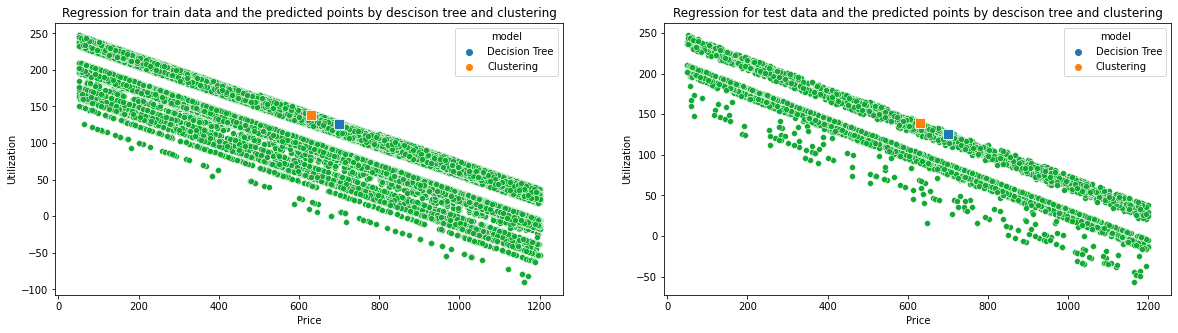

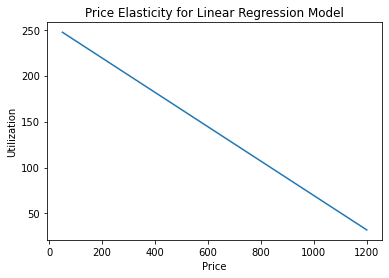

In [236]:
# Your answer goes here

dec_tree_util_pred = linear_reg_grid.predict(apt_dec_tree_x)[0]
print(f"Utilization for the price predicted by decision tree: {dec_tree_util_pred} (Predicted Price = {decision_tree_pred})")

clustering_util_pred = linear_reg_grid.predict(apt_clustering_x)[0]
print(f"Utilization for the price predicted by clustering: {clustering_util_pred} (Predicted Price = {clustering_pred})")

# Create a copy of the base price_util dataframe which represents 
price_util_df = price_util_base_df.copy()
price_util_df['utilization'] = [dec_tree_util_pred, clustering_util_pred]

# Predict utilization on train data (just for drawing the regression line)
y_pred_train = linear_reg_grid.predict(X_train_util)

# Plot predictions on training and test set and mark values predicted by decision tree and clustering
plot_price_util(X_train_util_init.values[:, -1], y_pred_train, X_test_util_init.values[:, -1], y_pred_lin_reg, price_util_df)

# Draw price elasticity for our apartment
draw_price_elasticity(linear_reg_grid, price_elasticity_samples, sample_price_values, "Linear Regression");

#### Linear SVR

Train and evaluate a Linear SVR (Support Vector Regression) model.

In [237]:
# Your answer goes here

param_grid = {"C":[0.1, 0.2, 1, 10, 100],
             "loss":['epsilon_insensitive', 'squared_epsilon_insensitive']}
linear_svr_grid = GridSearchCV(LinearSVR(), param_grid, cv = 5, verbose = 3) 
fitted_grid = linear_svr_grid.fit(X_train_util, y_train_util)

print(f"Best Param Grid: {linear_svr_grid.best_params_}")

y_pred_svr = linear_svr_grid.predict(X_test_util)

fitted_grid

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ...C=0.1, loss=epsilon_insensitive;, score=0.571 total time=   0.0s
[CV 2/5] END ...C=0.1, loss=epsilon_insensitive;, score=0.567 total time=   0.1s
[CV 3/5] END ...C=0.1, loss=epsilon_insensitive;, score=0.569 total time=   0.0s
[CV 4/5] END ...C=0.1, loss=epsilon_insensitive;, score=0.566 total time=   0.0s
[CV 5/5] END ...C=0.1, loss=epsilon_insensitive;, score=0.568 total time=   0.1s
[CV 1/5] END C=0.1, loss=squared_epsilon_insensitive;, score=0.657 total time=   0.1s
[CV 2/5] END C=0.1, loss=squared_epsilon_insensitive;, score=0.666 total time=   0.1s
[CV 3/5] END C=0.1, loss=squared_epsilon_insensitive;, score=0.656 total time=   0.1s
[CV 4/5] END C=0.1, loss=squared_epsilon_insensitive;, score=0.658 total time=   0.1s
[CV 5/5] END C=0.1, loss=squared_epsilon_insensitive;, score=0.659 total time=   0.1s
[CV 1/5] END ...C=0.2, loss=epsilon_insensitive;, score=0.592 total time=   0.1s
[CV 2/5] END ...C=0.2, 

/home/sandman/anaconda3/envs/env-IDS2022-23/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=100, loss=squared_epsilon_insensitive;, score=0.654 total time=   3.2s


/home/sandman/anaconda3/envs/env-IDS2022-23/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=100, loss=squared_epsilon_insensitive;, score=0.663 total time=   3.1s


/home/sandman/anaconda3/envs/env-IDS2022-23/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=100, loss=squared_epsilon_insensitive;, score=0.649 total time=   3.0s


/home/sandman/anaconda3/envs/env-IDS2022-23/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=100, loss=squared_epsilon_insensitive;, score=0.654 total time=   3.1s
[CV 5/5] END C=100, loss=squared_epsilon_insensitive;, score=0.658 total time=   3.1s
Best Param Grid: {'C': 0.1, 'loss': 'squared_epsilon_insensitive'}


/home/sandman/anaconda3/envs/env-IDS2022-23/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


GridSearchCV(cv=5, estimator=LinearSVR(),
             param_grid={'C': [0.1, 0.2, 1, 10, 100],
                         'loss': ['epsilon_insensitive',
                                  'squared_epsilon_insensitive']},
             verbose=3)

What is the mean absolute error achieved on the test data?

In [238]:
# Your answer goes here

mae_linear_svr = mean_absolute_error(y_test_util, y_pred_svr)
print("Mean absolute error for linear SVR: %.2f" % mae_linear_svr)

Mean absolute error for linear SVR: 35.40


Show (draw!) the price elasticity for your apartment. 

Utilization for the price predicted by decision tree: 125.57435484531672 (Predicted Price = 700.0)
Utilization for the price predicted by clustering: 138.6600712023179 (Predicted Price = 629.9505717447437)


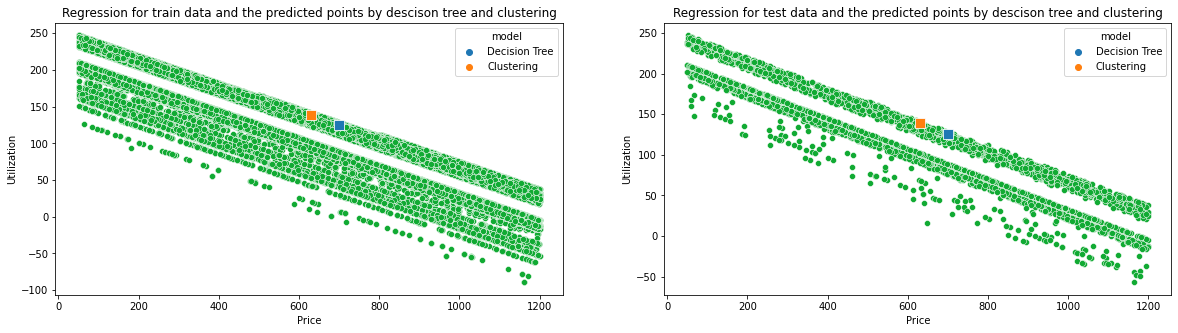

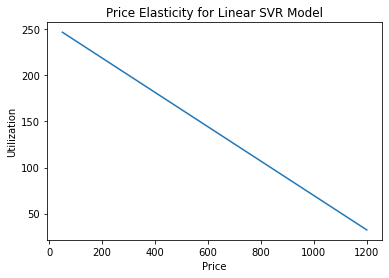

In [239]:
# Your answer goes here

dec_tree_util_pred = linear_svr_grid.predict(apt_dec_tree_x)[0]
print(f"Utilization for the price predicted by decision tree: {dec_tree_util_pred} (Predicted Price = {decision_tree_pred})")

clustering_util_pred = linear_svr_grid.predict(apt_clustering_x)[0]
print(f"Utilization for the price predicted by clustering: {clustering_util_pred} (Predicted Price = {clustering_pred})")

# Create a copy of the base price_util dataframe which represents 
price_util_df = price_util_base_df.copy()
price_util_df['utilization'] = [dec_tree_util_pred, clustering_util_pred]

# Predict utilization on train data (just for drawing the regression line)
y_pred_train = linear_svr_grid.predict(X_train_util)

# Plot predictions on training and test set and mark values predicted by decision tree and clustering
plot_price_util(X_train_util_init.values[:, -1], y_pred_train, X_test_util_init.values[:, -1], y_pred_lin_reg, price_util_df)

# Draw price elasticity for our apartment
draw_price_elasticity(linear_svr_grid, price_elasticity_samples, sample_price_values, "Linear SVR");

#### Learning Non-Linear Relationships

You realize that learning linear relationships only provides limited performance. You want to learn non-linear relationships. First, you will learn non-linear relationships using linear regression and kernels. Second, you will use non-linear kernels in the Support Vector Regression. Third, you will use neural networks.

#### Kernels in Regression

Use a transformation of the price and a regression to incorporate non-linear relationships, as learned in the lecture. You can try different kernel functions, but at least you should use one quadratic kernel.

In [240]:
# Your answer goes here

"""
Initializing the quadratic kernel by computing the squared value of prices
"""

def transform_data(data):
    # Create a copy of the original training data to avoid inflicting any change
    data_copy = np.copy(data)

    # Compute square of the price values
    price_values = data_copy[:, -1]
    price_values_squared = price_values ** 2

    # Add the price squared values to the training descripting features
    data_copy = np.concatenate((data_copy, price_values_squared.reshape(-1, 1)), axis = 1)
    
    return data_copy


# Transform the train data to feed to the model
X_train_util_transformed = transform_data(X_train_util)

# Create a linear regression model which will be fied will a non-linear relationship of the price
linear_regressor_kernel = LinearRegression()

# Perform 5-fold cross validation
linear_reg_kernel_grid = GridSearchCV(linear_regressor_kernel, {}, cv = 5, verbose = 3) 
linear_reg_kernel_fit_result = linear_reg_kernel_grid.fit(X_train_util_transformed, y_train_util)
display(fit_result)

"""Alternative Approach: Using Polynomial Features"""
# Create a pipeline with linear regression as the model (the pipeline is used as the grid search estimator)
pipeline = Pipeline(steps=[
    ('poly', PolynomialFeatures(include_bias=False)),
    ('model', LinearRegression()),
])

# Perform 5-fold cross validation
linear_reg_kernel_poly_grid = GridSearchCV(
    estimator=pipeline,
    param_grid={'poly__degree': [2, 3, 4]},
    cv=5,
    verbose=3
)
linear_reg_kernel_poly_grid.fit(X_train_util, y_train_util)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ..................................., score=0.794 total time=   0.0s
[CV 2/5] END ..................................., score=0.802 total time=   0.0s
[CV 3/5] END ..................................., score=0.796 total time=   0.0s
[CV 4/5] END ..................................., score=0.797 total time=   0.0s
[CV 5/5] END ..................................., score=0.800 total time=   0.0s


GridSearchCV(cv=5, estimator=LinearRegression(), param_grid={}, verbose=3)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END ....................poly__degree=2;, score=0.801 total time=   0.4s
[CV 2/5] END ....................poly__degree=2;, score=0.809 total time=   0.3s
[CV 3/5] END ....................poly__degree=2;, score=0.801 total time=   0.5s
[CV 4/5] END ....................poly__degree=2;, score=0.805 total time=   0.4s
[CV 5/5] END ....................poly__degree=2;, score=0.805 total time=   0.4s
[CV 1/5] END ....................poly__degree=3;, score=0.883 total time=   1.4s
[CV 2/5] END ....................poly__degree=3;, score=0.889 total time=   1.4s
[CV 3/5] END ....................poly__degree=3;, score=0.885 total time=   1.8s
[CV 4/5] END ....................poly__degree=3;, score=0.740 total time=   1.4s
[CV 5/5] END ....................poly__degree=3;, score=0.889 total time=   1.4s
[CV 1/5] END ....................poly__degree=4;, score=0.904 total time=   7.5s
[CV 2/5] END .....poly__degree=4;, score=-4050864

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('poly',
                                        PolynomialFeatures(include_bias=False)),
                                       ('model', LinearRegression())]),
             param_grid={'poly__degree': [2, 3, 4]}, verbose=3)

What is the mean absolute error achieved on the test data?

In [241]:
# Your answer goes here

# Prediction on the transformed test data
X_test_util_transformed = transform_data(X_test_util)
price_elasticity_samples_transformed = transform_data(price_elasticity_samples)
y_pred_lin_reg_kernel = linear_reg_kernel_grid.predict(X_test_util_transformed)

mae_lin_reg_kernel = mean_absolute_error(y_test_util, y_pred_lin_reg_kernel)
print("Mean absolute error for linear regression with manual kernel: %.2f" % mae_lin_reg_kernel)

y_pred_lin_reg_kernel_poly = linear_reg_kernel_poly_grid.predict(X_test_util)
mae_lin_reg_kernel = mean_absolute_error(y_test_util, y_pred_lin_reg_kernel_poly)
print("Mean absolute error for linear regression with polynomial kernel using Polynomial Features: %.2f" % mae_lin_reg_kernel)

Mean absolute error for linear regression with manual kernel: 29.43
Mean absolute error for linear regression with polynomial kernel using Polynomial Features: 21.84


Show (draw!) the price elasticity for your apartment. 

Utilization for the price predicted by decision tree: 93.4375 (Predicted Price = 700.0)
Utilization for the price predicted by clustering: 104.796875 ((Predicted Price = 629.9505717447437))


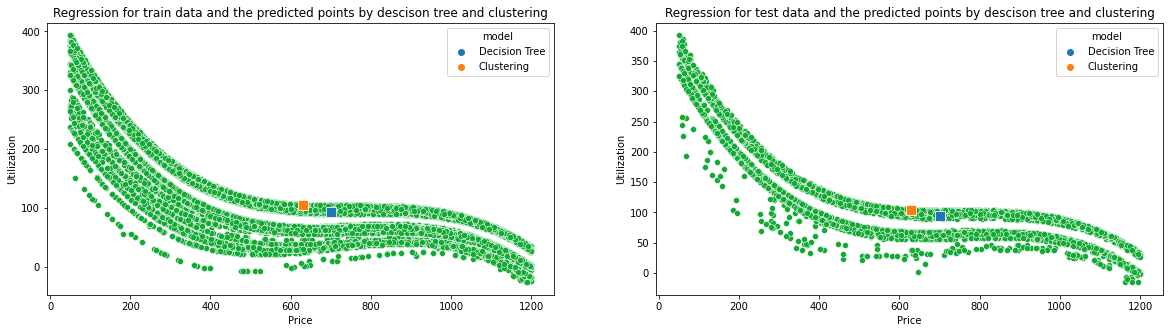

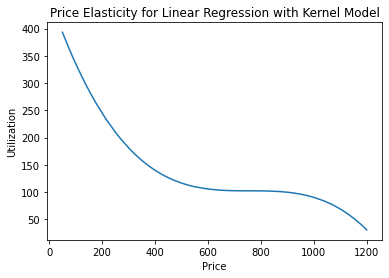

In [243]:
# Your answer goes here

# Based on price predicted by decision tree
apt_dec_tree_x_transformed = transform_data(apt_dec_tree_x)
dec_tree_util_pred = linear_reg_kernel_grid.predict(apt_dec_tree_x_transformed)[0]
print(f"Utilization for the price predicted by decision tree: {dec_tree_util_pred} (Predicted Price = {decision_tree_pred})")

# Based on price predicted by clustering
apt_clustering_x_transformed = transform_data(apt_clustering_x)
clustering_util_pred = linear_reg_kernel_grid.predict(apt_clustering_x_transformed)[0]
print(f"Utilization for the price predicted by clustering: {clustering_util_pred} ((Predicted Price = {clustering_pred}))")

# Create a copy of the base price_util dataframe which represents 
price_util_df = price_util_base_df.copy()
price_util_df['utilization'] = [dec_tree_util_pred, clustering_util_pred]

# Predict utilization on train data (just for drawing the regression line)
y_pred_train = linear_reg_kernel_poly_grid.predict(X_train_util)

# Plot predictions on training and test set and mark values predicted by decision tree and clustering
plot_price_util(X_train_util_init.values[:, -1], y_pred_train, X_test_util_init.values[:, -1], y_pred_lin_reg_kernel_poly, price_util_df)
x = linear_reg_kernel_poly_grid.predict(np.array([[0.6666667, 0.        , 1.        , 0.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 0.        ,
       0.00782609]]))

# Draw price elasticity for our apartment
draw_price_elasticity(linear_reg_kernel_poly_grid, price_elasticity_samples, sample_price_values, "Linear Regression with Kernel");

#### Kernels in SVR

Train and evaluate an SVR (Support Vector Regression) model with different, non-linear kernels. You can limit the size of your training set to 25000 samples to make the problem feasible in computation time.

In [244]:
# Your answer goes here

param_grid = {
    'kernel': ['rbf', 'poly', 'sigmoid'],
    'degree': list(range(2, 4)),
    "C":[1, 100]
}

# Limit the number of instances in the training set to be fed to the grid search
X_train_util_limited = X_train_util[:25000, :]
y_train_util_limited = np.array(y_train_util)[:25000]

# Apply grid search with the parameters specified above
svr_kernel_grid = GridSearchCV(SVR(), param_grid, cv = 5, verbose = 3) 
fitted_grid = svr_kernel_grid.fit(X_train_util_limited, y_train_util_limited)

print(f"Best Param Grid: {svr_kernel_grid.best_params_}")

fitted_grid

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END .........C=1, degree=2, kernel=rbf;, score=0.661 total time=  22.2s
[CV 2/5] END .........C=1, degree=2, kernel=rbf;, score=0.646 total time=  21.9s
[CV 3/5] END .........C=1, degree=2, kernel=rbf;, score=0.643 total time=  22.2s
[CV 4/5] END .........C=1, degree=2, kernel=rbf;, score=0.649 total time=  21.9s
[CV 5/5] END .........C=1, degree=2, kernel=rbf;, score=0.653 total time=  21.5s
[CV 1/5] END ........C=1, degree=2, kernel=poly;, score=0.635 total time=  18.0s
[CV 2/5] END ........C=1, degree=2, kernel=poly;, score=0.621 total time=  18.0s
[CV 3/5] END ........C=1, degree=2, kernel=poly;, score=0.616 total time=  17.9s
[CV 4/5] END ........C=1, degree=2, kernel=poly;, score=0.624 total time=  18.0s
[CV 5/5] END ........C=1, degree=2, kernel=poly;, score=0.629 total time=  18.1s
[CV 1/5] END ..C=1, degree=2, kernel=sigmoid;, score=-112.756 total time=  46.3s
[CV 2/5] END ..C=1, degree=2, kernel=sigmoid;, s

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [1, 100], 'degree': [2, 3],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=3)

What is the mean absolute error achieved on the test data?

In [245]:
# Your answer goes here


y_pred_svr_kernel = svr_kernel_grid.predict(X_test_util)

mae_svr_kernel = mean_absolute_error(y_test_util, y_pred_svr_kernel)
print("Mean absolute error for SVR with kernel: %.2f" % mae_svr_kernel)

Mean absolute error for SVR with kernel: 23.44


Show (draw!) the price elasticity for your apartment. 

Utilization for the price predicted by decision tree: 101.47813355960426 (Predicted Price = 700.0)
Utilization for the price predicted by clustering: 106.86301719730841 (Predicted Price = 629.9505717447437)


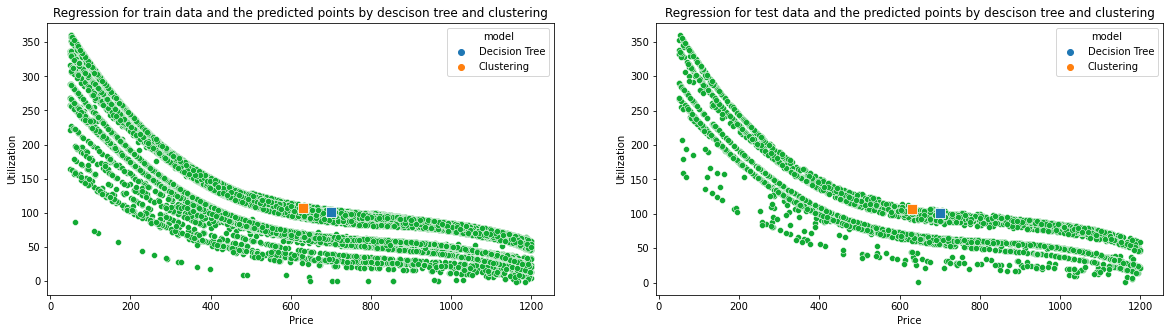

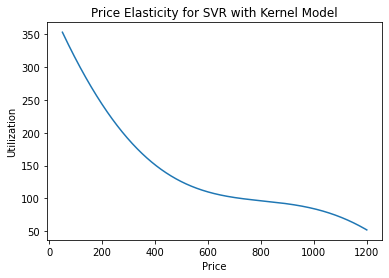

In [247]:
# Your answer goes here

dec_tree_util_pred = svr_kernel_grid.predict(apt_dec_tree_x)[0]
print(f"Utilization for the price predicted by decision tree: {dec_tree_util_pred} (Predicted Price = {decision_tree_pred})")

clustering_util_pred = svr_kernel_grid.predict(apt_clustering_x)[0]
print(f"Utilization for the price predicted by clustering: {clustering_util_pred} (Predicted Price = {clustering_pred})")

# Create a copy of the base price_util dataframe which represents 
price_util_df = price_util_base_df.copy()
price_util_df['utilization'] = [dec_tree_util_pred, clustering_util_pred]

# Predict utilization on train data (just for drawing the regression line)
y_pred_train = svr_kernel_grid.predict(X_train_util_limited)

# Plot predictions on training and test set and mark values predicted by decision tree and clustering
plot_price_util(X_train_util_init.values[:25000, -1], y_pred_train, X_test_util_init.values[:, -1], y_pred_svr_kernel, price_util_df)

# Draw price elasticity for our apartment
draw_price_elasticity(svr_kernel_grid, price_elasticity_samples, sample_price_values, "SVR with Kernel");

What is your conclusion on using kernels?

_Answer:_

The main use of kernels is that they can capture **non-linearities** between the descriptive features and the target feature using **linear models**; therefore, we can use this for the cases which are not linearly separable by only transforming the features and feeding it to a linear model. Here, we are providing a polynomial transformation of the price value and fitting a linear regression model to the new features (keeping all the previous features and adding a quadratic form of the price value). We can see that the score obtained from the cross-validation has increased and the mean absolute error has drastically dropped. 

#### Neural Network

Learn a neural network (multilayer perceptron) to predict the utilization of an AirBnB.

In [248]:
# Your answer goes here

mlp_reg = MLPRegressor(max_iter=1000, random_state=0)

params_grid = {
    'activation' : ['tanh', 'relu'],
    'solver' : ['adam']
}

# Apply grid search using MLPRegressor with 5-fold cross validation and parameters specified above
mlp_reg_grid = GridSearchCV(mlp_reg, params_grid, n_jobs=-1, cv=5, verbose=3)
mlp_reg_grid.fit(X_train_util, y_train_util)

print(mlp_reg_grid.best_params_)

y_pred_mlp = mlp_reg_grid.predict(X_test_util)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 3/5] END ......activation=relu, solver=adam;, score=0.914 total time= 2.1min
[CV 1/5] END ......activation=tanh, solver=adam;, score=0.912 total time= 2.2min
[CV 1/5] END ......activation=relu, solver=adam;, score=0.913 total time= 2.5min
[CV 4/5] END ......activation=tanh, solver=adam;, score=0.914 total time= 2.5min
[CV 2/5] END ......activation=relu, solver=adam;, score=0.916 total time= 2.5min
[CV 2/5] END ......activation=tanh, solver=adam;, score=0.916 total time= 2.8min
[CV 3/5] END ......activation=tanh, solver=adam;, score=0.913 total time= 1.9min
[CV 5/5] END ......activation=relu, solver=adam;, score=0.916 total time= 2.1min
[CV 5/5] END ......activation=tanh, solver=adam;, score=0.916 total time= 1.8min
[CV 4/5] END ......activation=relu, solver=adam;, score=0.914 total time= 2.7min
{'activation': 'relu', 'solver': 'adam'}


What is the mean absolute error achieved on the test data?

In [249]:
# Your answer goes here
print("Mean absolute error: %.2f" % mean_absolute_error(y_test_util, y_pred_mlp))

Mean absolute error: 18.64


Show (draw!) the price elasticity for your apartment. 

Utilization for the price predicted by decision tree: 106.8918178759119 (Predicted Price = 700.0)
Utilization for the price predicted by clustering: 113.16430261508212 (Predicted Price = 629.9505717447437)


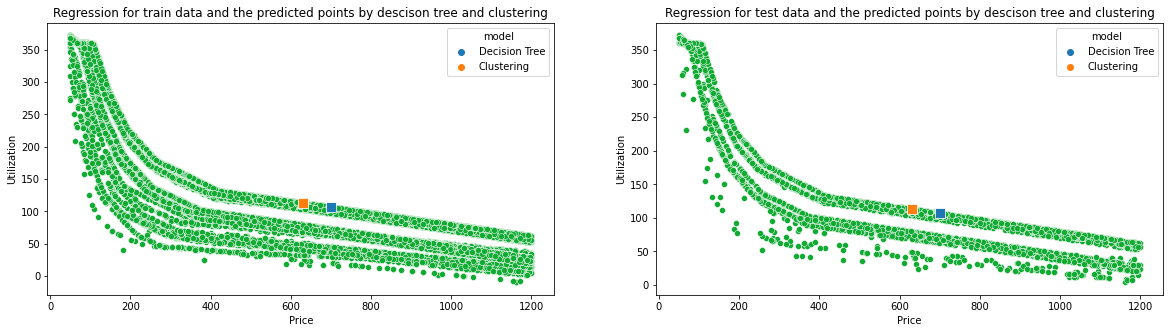

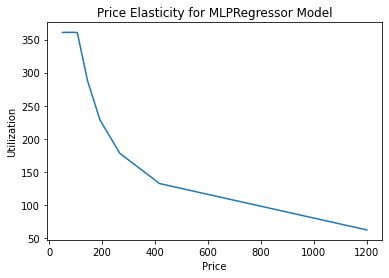

In [250]:
# Your answer goes here
# Your answer goes here

dec_tree_util_pred = mlp_reg_grid.predict(apt_dec_tree_x)[0]
print(f"Utilization for the price predicted by decision tree: {dec_tree_util_pred} (Predicted Price = {decision_tree_pred})")

clustering_util_pred = mlp_reg_grid.predict(apt_clustering_x)[0]
print(f"Utilization for the price predicted by clustering: {clustering_util_pred} (Predicted Price = {clustering_pred})")

# Create a copy of the base price_util dataframe which represents 
price_util_df = price_util_base_df.copy()
price_util_df['utilization'] = [dec_tree_util_pred, clustering_util_pred]

# Predict utilization on train data (just for drawing the regression line)
y_pred_train = mlp_reg_grid.predict(X_train_util)

# Plot predictions on training and test set and mark values predicted by decision tree and clustering
plot_price_util(X_train_util_init.values[:, -1], y_pred_train, X_test_util_init.values[:, -1], y_pred_mlp, price_util_df)

# Draw price elasticity for our apartment
price_elasticity_preds = draw_price_elasticity(mlp_reg_grid, price_elasticity_samples, sample_price_values, "MLPRegressor")

### Profit discrepencies when incorporating price elasticity

Use the model that best captures price elasticity on the testing set. You can assume that this model accurately captures price elasticity, i.e., is the ground truth. What is the better of the two proposed prices? Is the better price the optimal price?

### **Brief Overview of Price Elasticity of Demand**

The basic definition of the **price elasticity of demand** for a good or service, etc, is the **percentage change in quantity demanded** of a particular good or service divided by the **percentage change in the price** of that good or service, all other things unchanged. The mathematical formula for price elasticity, denoted by 
$e_d$, can be shown as below:

$$
  e_d = \frac{\%dQ}{\%dP}
$$

Based on different values for the price elasticity, we can define the following terms:

- $e_d < 1$ (Elastic): changes in price are matched by a stronger change in quantity demanded
- $e_d = 1$ (Unitary Elastic): changes in price are matched by an equal change in quantity demanded
- $-1 < e_d < 0$ (Inelastic): changes in price are matched by a weaker change in quantity demanded
- $e_d > 0$ (Giffen good): increases in price are associated with increases in quantity demanded (and vice-versa)

We can also use price elasticity to find the optimal price, i.e, the profit-maximizing price:

$$P_{opt} = MC * (\frac{e_d}{e_d + 1})$$

where $MC = \frac{\varDelta P}{\varDelta Q}$ is the marginal cost, i.e, change in price divided by the change in quantity (demand).

**Important Note**: The formula for the optimal price does not really apply to our case, because this is used for selling products, not for a one-time pricing.

In [254]:
# Your answer goes here

import math

# Function to calculate price elasticity based on the formula we have presented above
def calc_price_elasticity(first_price, second_price, first_utilization, second_utilization):
    return ((second_utilization - first_utilization) / first_utilization) / ((second_price - first_price) / first_price)

def calc_optimal_price(price_elasticity):
    # Find the marginal cost based on the formula we have provided above
    marginal_cost = (clustering_pred - decision_tree_pred) / (clustering_util_pred - dec_tree_util_pred)
    optimal_price = marginal_cost * (price_elasticity / (price_elasticity + 1))
    return optimal_price

# Find the maximum profit based on predicted prices and utilizations (taking into account the predictions of the MLPRegressor for utilization as the ground truth)
def find_optimal_values(sample_prices, sample_utilizations):
    profits = sample_prices * sample_utilizations
    highest_profit_index = np.argmax(profits)
    return sample_prices[highest_profit_index], sample_utilizations[highest_profit_index]


similar_instances = X_train_util_init[(utilization_data['number rooms'] == 2) & (utilization_data['room type'] == 'Entire home/apt') & (utilization_data['neighborhood group'] == 'Manhattan')]

# Calculate price elasticity and optimal price based on the explanations provided in the cell above
price_elasticity = calc_price_elasticity(decision_tree_pred, clustering_pred, dec_tree_util_pred, clustering_util_pred)
total_profit_dec_tree = decision_tree_pred * dec_tree_util_pred
total_profit_clustering = clustering_pred * clustering_util_pred
optimal_price = calc_optimal_price(price_elasticity)

# Find similar instances and investigate their price and utilization values
similar_instances['utilization'] = y_train_util[similar_instances.index]
higher_price_cases = similar_instances[(similar_instances['price'] >= decision_tree_pred) & (similar_instances['utilization'] >= dec_tree_util_pred)]

optimal_price, optimal_utilization = find_optimal_values(sample_price_values, price_elasticity_preds)

display(higher_price_cases)
print(f"Price Elasticity Based On Utilization Values Predicted by MLPRegressor: {price_elasticity}")
print(f"Total Profit for Price Predicted by Decision Tree: {total_profit_dec_tree}")
print(f"Total Profit for Price Predicted by Clustering: {total_profit_clustering}")
print(f"Optimal Price and Optimal Utilization: {optimal_price}, {optimal_utilization}")
print(f"Maximum Profit: {optimal_price * optimal_utilization}")

/tmp/ipykernel_14872/3449220665.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  similar_instances = X_train_util_init[(utilization_data['number rooms'] == 2) & (utilization_data['room type'] == 'Entire home/apt') & (utilization_data['neighborhood group'] == 'Manhattan')]
/tmp/ipykernel_14872/3449220665.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  similar_instances['utilization'] = y_train_util[similar_instances.index]


number rooms neighborhood group        room type  price  utilization
42263             2          Manhattan  Entire home/apt    824   113.529456
17595             2          Manhattan  Entire home/apt    934   128.162284
65507             2          Manhattan  Entire home/apt    785   118.978227
59135             2          Manhattan  Entire home/apt    954   127.384684
144               2          Manhattan  Entire home/apt    935   115.795439
...             ...                ...              ...    ...          ...
41240             2          Manhattan  Entire home/apt   1058   114.428398
9337              2          Manhattan  Entire home/apt    964   120.885155
65726             2          Manhattan  Entire home/apt    780   110.875225
52256             2          Manhattan  Entire home/apt    718   181.943466
41606             2          Manhattan  Entire home/apt   1041   113.939543

[760 rows x 5 columns]

Price Elasticity Based On Utilization Values Predicted by MLPRegressor: -0.5863927543792595
Total Profit for Price Predicted by Decision Tree: 74824.27251313833
Total Profit for Price Predicted by Clustering: 71287.91713346618
Optimal Price and Optimal Utilization: 947, 84.77452485633911
Maximum Profit: 80281.47503895314


_Answer:_

### Summary of Observations on Price Elasticity

Taking into account the *mean absolute error* of the models we've trained on the test data, we observe that the **MLPRegressor** has achieved the best result due to its lowest error on the test data. If we consider the predictions made by the **MLPRegressor** as the ground truth, we have the following price/utilization values:

- **(Price, Utilization) Predicted for Decision Tree**: (700, 67.75)
- **(Price, Utilization) Predicted for Clustering**: (630, 73.7)

Based on the values obtained for price and utilization, we see that the higher price results in lower utilization and the lower price leads to a higher value for utilization. Based on the price elasticity calculated for the apartment (-0.876) and the explanations provided above about this term, we can see that we have an **inelastic** case. Therefore, a change in price does not dramatically affect the demand. So, we can conclude that the price predicted by **decision tree** is a better price, which is equal to 700.



The better price is not the optimal price based on the formula we provided above for the optimal price (although this does not really apply to our case). But more importantly, given that we are renting the apartment only once and no consideration of revenue is under observation, a higher price could be more convincing if the demand does not drop dramatically. There are some cases in which we result in a higher utilization with a higher price value, as indicated in the code cell above. Therefore, the price predicted is **not the optimal price**. Additonally, given that we consider utilization as the *average number of bookings per night* over a time period, we can find the maximum profit we can gain from the utilization and the predicted price values. We can clearly see that there is at least one case with a higher price (but with a lower utilization) that leads to a higher profit. Therefore, we can again emphasize that **the better price is not the optimal price in our case**.

# Question 4: Conclusion

Summarize your findings and discuss limitations.

_Answer:_ 

As the assignment consists of 3 main tasks, where each task tries to analyze the problem from a different perspective, we are also going to discuss our findings in 3 parts.

**First Part: Dataset Cleaning and Analysis**:

**Summary of findings and what we have done**: One of the essential parts of the assignment and any data science project is to perform certain data cleaning techniques. Primarily, we are removing the rows in which **NaN values** exist for at least one feature. There are however alternative approaches to handle missing values, such as replacing them with the mean value for that feature calculated over the whole dataset, or replacing them with the most frequent value for that feature. Next, we remove the duplicates from the dataset based on the *id* column. Note that this is also a very reasonable and useful method since duplicate instances do not introduce any new information to our learning model. Afterwards, we move on to the analysis phase. This is one of the most fundamental things we should do as it can give us insightful information about the influence of different features on the price and the relationship between different features overall. We can also get a good sense of the range of values and their distribution by performing basic statistics on the dataset. For investigating the relationship between different features, especially the relationship between the features with price, we have taken several approaches. First, We performed univariate analysis to derive the influence of several features on price by drawing *joint plots* and displaying the correlation matrix. We have also provided the statistical information for the price values when grouped by different features. This approach is beneficial to find features which influence the price values in an individual way. However, in order to find the combination of features which are useful for our further tasks, i.e. to estimate the price and finally the utilization, multivariate analysis is more intuitive. Ultimately, we performed a *chi-square test* as a feature selection method in order to find the most relevant features for price estimation. From our observations, we found out that most features are irrelevant for price estimation and do not provide any insight for our task. Based on the analysis we have done in the first task, the most relevant features are the **number rooms**, **room type**, and **neighborhood group**. However, **construction year** also seems to cause some variation in price, but it’s not quite significant.

**Limitations**: Most of the features we have been provided with in the dataset is rather irrelevant to price estimation, as indicated by the analysis we have done in the first part. Besides, there’s one important thing we need to consider when choosing a large number of features, and that is the concept known as *curse of dimensionality*. The concept suggests that as features are useful for predicting the final result, this might also deteriorate the result if we choose a large number of features as predictors due to the fact that this might affect the generalization of the model.

**Second Part: Price Estimation Using Different Models**:

**Summary of findings and what we have done**: In this part of the assignment, we are focusing on price estimation using different models and with the features we have been asked to consider as the input features. First, we are setting a baseline for price estimation, which is simply the average price of the instances in our training set. This is indeed not a reasonable approach for price estimation as it does not take into account any of the features of the instances. Secondly, we consider using the decision tree for price estimation. Although this approach provides us with more accurate results, this is still not quite a suitable approach as decision trees are not really useful for regression tasks and are also vulnerable to overfitting. The last technique we are exploiting for price estimation is clustering. We are using clustering to bring similar instances together inside a cluster, and then assign the mean price values computed over the instances available in the clusters as the predicted value. However, there are several problem with this approach. First, clustering is mostly used for unsupervised problems, i.e. problems in which we don’t have an explicit label or target feature in our dataset, which is not our case (since we have price value as the target feature). Besides, we are using K-means clustering, which requires us to come up with the number of clusters beforehand. Also, it does not provide us with a very formidable result as the prediction since it only suggests the mean price value of the cluster our instance is assigned to.

**Limitations**: The baseline approach is definitely limited in accuracy due to the fact that it does not take into account any of the features provided in the dataset. Besides, decision tree also fails to provide an accurate estimation for price because we are returning the mean value of an interval as the prediction, which is obviously not a very precise estimation. Moreover, decision trees are somehow limited in predicting continuous values, and are unstable in nature. By last argument we mean that a small change in the data can result in a major change in the structure of the decision tree, which can convey a different result from what users will get in a normal event Finally, the clustering approach is also not quite suitable for our problem, because we have a supervised problem at hand but clustering is mostly used in unsupervised contexts. Additionally, we are considering the mean value of price for each cluster as the prediction, which is not quite accurate in essence. Ultimately, the problem with K-means clustering is that we need to come up with the number of clusters beforehand. Although we are performing **elbow method** and **silhouette** analysis to find the best number of clusters, they might still not provide us with the most effective number of clusters.

**Third Part: Investigating the Effect of Price Elasticity**:

**Summary of findings and what we have done**: For the last part, we are trying to see the effect of price variations on demands (utilization). First, we have performed analysis for the relationship between the price and utilization by plotting graphs based on the two features and also consider the other features as along with these two. From the plots, we can clearly observe that **higher prices do not necessarily result in lower utilization and vice versa**. Moreover, we are exploiting different models with 5-fold cross validation to predict utilization based on *number rooms*, *room type*, *neighborhood group*, and *price*. Based on the accuracy and error on test set we obtain for the different models, we can see that *linear models* are somehow unsuitable for our problem as they result in the highest error and lowest accuracy. However, as we incorporate kernels with linear models, we get better results since we are also capturing non-linearities using a linear model. One important consideration we can make here is that we get different scores for different hyper parameters we are using for each model. However, we try to find the best parameters using grid search for each of the models we are considering in this task. Finally, we used a neural network to predict utilization based on the features we mentioned previously, and it resulted in the highest score and lowest *mean absolute error*. At the end, we are trying to find out which of the two prices predicted by decision tree and clustering is better based on the price elasticity for our apartment. Given that we can treat utilization as *average number of bookings per year*, we could obtain the better price using the price elasticity factor by computing the product of the utilization and price to get the max-profitting result (the value to maximize our profit) over a time period *t*. Note that we also introduced another technique to choose between the two prices, which exploits the concept of price elasticity. In our argument, we indicate that we have an **inelastic** case; therefore, changing price does not significantly affect the utilization. As a result, we could choose the higher price as the better price. For the discussion over whether the chosen price is the optimal price or not, we refer to the price elasticity plot (for the MLPRegressor model since it has the highest accuracy and  we have chosen this as the ground truth) to see if we could obtain a larger value compared to the one we computed as the total profit.

**Limitations**: One of the important limitations we have when applying machine learning techniques is that we often need large amounts of data, and we might not have that available.
